In [1]:
cd '/Users/nikhilsingh/Downloads/Dalmia_machine_learning/Nikhil'

/Users/nikhilsingh/Downloads/Dalmia_machine_learning/Nikhil


In [769]:
import numpy as np 
import pandas as pd 
from utility.db_data import connection_db
from utility.datetime_util import create_date_columns
import warnings
warnings.filterwarnings('ignore')
from utility.read_table import read_multiple_tables

In [3]:
host="database-dalmia.cms6cet2hwec.ap-south-1.rds.amazonaws.com"
database="dalmia_digital"
user="postgres"
password="dalmia123"
sql_query =  "SELECT * FROM dalmia_sales.sales_data where billing_date > '2021-04-01' and sold_to_party_code between 7000000 and 7099999"

In [4]:
#reading the data
df = connection_db(host= host , database=database, user=user , password=password, sql_query=sql_query)

In [10]:
df_prev = read_multiple_tables('/Users/nikhilsingh/Downloads/Dalmia_machine_learning/Nikhil/data/Sales Data')

In [766]:
def return_yoy_df(df):
    df_sales = create_date_columns([df])
    df_sales = df_sales[['sold_to_party_code','Month_Year','bill_quantity']]
    #df_sales =df_sales[df_sales['sold_to_party_code']!='DONATION']
    df_group_month = df_sales.groupby(['sold_to_party_code','Month_Year']).agg({'bill_quantity': ['sum']}).reset_index()
    df_group_month.columns = ['Sold To Party Code', 'Month Year' , 'Sum']
    pivot_table = pd.pivot_table(df_group_month, values='Sum',columns='Month Year', index = 'Sold To Party Code')
    return pivot_table
pivot = return_yoy_df(df)

KeyError: 'Billing Date'

In [7]:
pivot

Month Year,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,255.5,85.0,207.0,102.0,73.5,74.5,43.0,25.0,76.0,53.0,...,20.0,20.0,122.5,75.0,90.0,155.0,46.0,111.0,96.0,80.0
7000010,57.0,37.0,NaN,24.0,30.0,NaN,41.0,24.0,25.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,12.0,24.0
7000015,4.0,50.0,63.0,62.0,91.0,68.5,70.5,77.0,50.0,44.5,...,74.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000019,12.0,50.0,133.0,104.0,165.0,123.5,NaN,7.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,5.0,21.0,24.0,NaN,29.0,NaN,27.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
7041477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7041478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0


In [770]:
def return_yoy_df(df):
    df_sales = create_date_columns([df])
    df_sales = df_sales[['sold_to_party_code','Month_Year','gross_bill_price']]
    #df_sales =df_sales[df_sales['sold_to_party_code']!='DONATION']
    df_group_month = df_sales.groupby(['sold_to_party_code','Month_Year']).agg({'gross_bill_price': ['sum']}).reset_index()
    df_group_month.columns = ['Sold To Party Code', 'Month Year' , 'Sum']
    pivot_table = pd.pivot_table(df_group_month, values='Sum',columns='Month Year', index = 'Sold To Party Code')
    return pivot_table
pivot_price = return_yoy_df(df)

In [771]:
pivot_price = pivot_price.fillna(0)

In [773]:
pivot_price.to_csv('price.csv')

In [790]:
pivot_price

Month Year,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,1872860.0,642600.0,1558920.0,809120.0,512830.0,480650.0,317240.0,184500.0,501120.0,368260.0,...,148000.0,152000.0,919000.0,547000.0,670500.0,1147000.0,341250.0,832000.0,713450.0,611000.0
7000010,425220.0,276020.0,0.0,191040.0,208000.0,0.0,292680.0,175920.0,165500.0,152880.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178800.0,88800.0,178200.0
7000015,30240.0,373500.0,475580.0,489720.0,620690.0,443090.0,503920.0,570500.0,327380.0,303830.0,...,545102.0,204600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000019,90720.0,378000.0,1016280.0,821440.0,1147500.0,810940.0,0.0,56850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,155300.0,37000.0,156800.0,165600.0,0.0,200100.0,0.0,193200.0,85200.0,86400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28350.0
7041477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37750.0
7041478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,831600.0


In [11]:
pivot_price['total'] = pivot_price.sum(axis = 1)

In [12]:
def size(number):
    if number<10000000:
        return 'Small'
    if number>=10000000 and number<15000000:
        return 'Medium'
    if number>=15000000:
        return 'Large'
pivot_price['size'] = pivot_price['total'].apply(size)

In [13]:
pivot_price.to_csv('data/price.csv')

In [11]:
import datetime
def timeseries_conversion(excel_serial_number):
    reference_date = datetime.datetime(1900, 1, 1)
    dt = reference_date + datetime.timedelta(days=excel_serial_number - 2)
    return dt

def create_date_columns(df_list):#pass the dataframe in the list format 
    new_df = pd.DataFrame()
    for i in df_list:
        i['date'] = pd.to_datetime(i['Billing Date'])
        i['Month_Year'] = pd.to_datetime(i['date']).dt.strftime('%Y-%m')
        i['Year'] = pd.to_datetime(i['date']).dt.year
        i['Quarter'] = i['date'].dt.to_period('Q')
        new_df = pd.concat([new_df,i], axis=0)

    return new_df
def return_yoy_df(df):
    df['Billing Date'] = df['Billing Date'].apply(timeseries_conversion)
    df_sales = create_date_columns([df])
    df_sales = df_sales[['Sold To Party Code','Month_Year','Bill Quantity']]
    #df_sales =df_sales[df_sales['sold_to_party_code']!='DONATION']
    df_group_month = df_sales.groupby(['Sold To Party Code','Month_Year']).agg({'Bill Quantity': ['sum']}).reset_index()
    df_group_month.columns = ['Sold To Party Code', 'Month Year' , 'Sum']
    pivot_table = pd.pivot_table(df_group_month, values='Sum',columns='Month Year', index = 'Sold To Party Code')
    return pivot_table
pivot_prev = return_yoy_df(df_prev)

In [12]:
pivot = pivot.fillna(0)

In [13]:
pivot_prev = pivot_prev[(pivot_prev.index>=7000000)&(pivot_prev.index<7100000)]

In [14]:
pivot_prev = pivot_prev.fillna(0)


In [15]:
pivot_prev

Month Year,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
Sold To Party Code,,,,,,,,,,,,
7000002,15.0,15.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000004,0.0,397.0,326.50,242.0,66.0,241.0,116.0,200.0,285.0,327.0,312.0,385.0
7000010,20.0,89.7,50.00,30.0,30.0,20.0,20.0,40.0,50.0,50.0,20.0,60.0
7000011,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,31.0,38.0,30.0,0.0
7000015,22.0,218.0,110.95,144.0,102.0,36.0,79.0,68.0,97.0,103.3,72.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7033690,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
7033692,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
7033693,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [16]:
def count_zeros_before_first_nonzero(row):
    count = 0
    for value in row:
        if value == 0:
            count += 1
        else:
            break 
    return count
pivot['month_new_dealer'] = pivot.apply(count_zeros_before_first_nonzero , axis = 1)
#table with dealers having atleast 12 months of trend 
dealer_sales = pivot[pivot['month_new_dealer']<=13] 

In [17]:
def count_trailing_zeros_before_end_index(df, end_index):
    counts = []
    for row in df.itertuples(index=False):
        count = 0
        for i in range(end_index - 1, -1, -1):
            if row[i] == 0:
                count += 1
            else:
                break
        counts.append(count)
    return counts

result_matrix = pd.DataFrame(index = dealer_sales.index)
for i in range(len(dealer_sales.columns)):
    string = str(i)
    result_matrix[string] = count_trailing_zeros_before_end_index(dealer_sales, i)
result_matrix.drop('0', axis = 1 , inplace = True)

In [18]:
#Status of each dealer 
def inactive(value):
    if value == 0: 
        return 'Active'
    elif value == 1: 
        return 'Active_1N'
    elif value == 2: 
        return 'Active_2N'
    elif value == 3: 
        return 'Active_3N'
    elif value>3 and value <=12:
        return 'Inactive'
    else: 
        return 'Churn'
    
for i in result_matrix.columns:
    result_matrix[i] = result_matrix[i].apply(inactive)

In [19]:
#getting the count of non transaction months
result_matrix['month_new_user'] = dealer_sales['month_new_dealer']
#result_matrix_copy_1 = result_matrix.copy()
for i in range(result_matrix.shape[0]):
    value = result_matrix.iloc[i,28]
    #print(result_matrix_copy_1.iloc[:, :value])  
    result_matrix.iloc[i, :value] = '-'

In [20]:
data = pivot.merge(result_matrix[['28']], left_index=True , right_index=True , how = 'inner')

In [21]:
data_1 = data.drop(['2023-06', '2023-05',
       '2023-04','month_new_dealer', '28'],axis = 1 )

In [22]:
def count_zeros_before_first_nonzero(row):
    count = 0
    for value in row:
        if value == 0:
            count += 1
        else:
            break 
    return count

In [23]:
cols_inv = ['2023-03', '2023-02', '2023-01','2022-12', '2022-11',
       '2022-10', '2022-09', '2022-08', '2022-07', '2022-06', '2022-05',
       '2022-04', '2022-03', '2022-02', '2022-01', '2021-12', '2021-11',
       '2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05','2021-04']
cols = ['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']

In [24]:
data_1 = data_1[cols_inv]
data_1['zero_count'] = data_1.apply(count_zeros_before_first_nonzero , axis = 1)

In [25]:
data_1 = data_1[data_1['zero_count']<=12]

In [26]:
data_1

,2023-03,2023-02,2023-01,2022-12,2022-11,2022-10,2022-09,2022-08,2022-07,2022-06,...,2021-12,2021-11,2021-10,2021-09,2021-08,2021-07,2021-06,2021-05,2021-04,zero_count
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,155.00,90.00,75.0,122.5,20.0,20.0,20.0,20.0,22.00,35.0,...,76.0,25.0,43.0,74.5,73.5,102.0,207.0,85.0,255.5,0
7000010,0.00,0.00,0.0,0.0,0.0,0.0,0.0,12.0,33.80,0.0,...,25.0,24.0,41.0,0.0,30.0,24.0,0.0,37.0,57.0,7
7000015,0.00,0.00,0.0,0.0,27.0,74.0,45.0,54.5,42.00,100.0,...,50.0,77.0,70.5,68.5,91.0,62.0,63.0,50.0,4.0,4
7000022,29.00,0.00,24.0,21.0,5.0,22.0,24.0,12.0,12.00,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7000025,173.00,137.00,167.0,73.0,108.8,48.0,95.0,75.0,175.00,161.0,...,60.0,117.0,107.0,102.0,107.5,105.0,87.0,108.5,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,91.05,69.95,92.0,75.2,86.8,70.3,55.0,63.0,100.00,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7036499,170.00,195.00,34.2,50.5,99.0,100.5,103.0,25.5,123.00,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7036501,1055.00,423.00,1005.5,102.0,141.0,101.0,109.0,7.0,15.00,80.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
test = pd.DataFrame(columns = ['m-1', 'm-2' , 'm-3' , 'm-4', 'm-5' , 'm-6' , 'm-7' , 'm-8' , 
                              'm-9', 'm-10' , 'm-11' , 'm-12'] , index = data_1.index)

In [28]:
for i in range(data_1.shape[0]):
    value = data_1.iloc[i , 24]
    test.iloc[i,] = data_1.iloc[i , value:value+12]

In [29]:
test.shape

(10012, 12)

In [30]:
result_matrix_1= result_matrix.merge(test[['m-1']] , left_index=True , right_index=True , how = 'inner')
result_matrix_1.drop(['month_new_user','m-1'],axis =1 , inplace = True)

In [31]:
result_matrix_1['zero_count'] = data_1['zero_count']
y = pd.DataFrame(columns = ['state_m','state_m+1','state_m+2'], index = result_matrix_1.index)
for i in range(result_matrix_1.shape[0]):
    value = result_matrix_1.iloc[i , 28]
    y.iloc[i,] = result_matrix_1.iloc[i , 28-value-4:28-value-1]

In [32]:
y

,state_m,state_m+1,state_m+2
Sold To Party Code,,,
7000004,Active,Active,Active
7000010,Active_1N,Active_2N,Active_3N
7000015,Active_1N,Active_2N,Active_3N
7000022,Active_1N,Active,Active
7000025,Active,Active,Active
...,...,...,...
7036491,Active,Active,Active
7036499,Active,Active,Active
7036501,Active,Active,Active


In [33]:
test['m-1_qoq'] = test['m-1']-test['m-4']
test['m-2_qoq'] = test['m-2']-test['m-5']
test['m-3_qoq'] = test['m-3']-test['m-6']
test['m-4_qoq'] = test['m-4']-test['m-7']
test['m-5_qoq'] = test['m-5']-test['m-8']
test['m-6_qoq'] = test['m-6']-test['m-9']
test['m-1_hy'] = test['m-1']-test['m-7']
test['m-2_hy'] = test['m-2']-test['m-8']
test['m-3_hy'] = test['m-3']-test['m-9']
test['m-4_hy'] = test['m-4']-test['m-10']
test['m-5_hy'] = test['m-5']-test['m-11']
test['m-6_hy'] = test['m-6']-test['m-12']

In [34]:
test['count_no_transaction'] = (test[['m-12', 'm-11', 'm-10', 'm-9', 'm-8', 'm-7', 'm-6', 'm-5', 'm-4', 'm-3',
       'm-2', 'm-1']] == 0).astype(int).sum(axis=1)

In [35]:
seasonal = pd.read_csv('data/seasonal.csv')
seasonal.index = seasonal['Unnamed: 0']
seasonal.drop('Unnamed: 0', axis = 1, inplace = True)

In [36]:
test = test.merge(seasonal , left_index=True , right_index=True , how = 'left')

In [37]:
test = test.fillna(0)
test['seasonal_dealer'].value_counts()

0.0    9495
1.0     517
Name: seasonal_dealer, dtype: int64

In [38]:
test

,m-1,m-2,m-3,m-4,m-5,m-6,m-7,m-8,m-9,m-10,...,m-5_qoq,m-6_qoq,m-1_hy,m-2_hy,m-3_hy,m-4_hy,m-5_hy,m-6_hy,count_no_transaction,seasonal_dealer
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,155.00,90.00,75.0,122.5,20.0,20.0,20.0,20.0,22.00,35.0,...,0.0,-2.00,135.00,70.00,53.00,87.5,-94.0,-71.0,0,0.0
7000010,12.00,33.80,0.0,17.0,25.0,0.0,25.0,24.0,25.00,24.0,...,1.0,-25.00,-13.00,9.80,-25.00,-7.0,-16.0,0.0,3,0.0
7000015,27.00,74.00,45.0,54.5,42.0,100.0,75.5,27.0,70.50,15.0,...,15.0,29.50,-48.50,47.00,-25.50,39.5,-2.5,50.0,0,0.0
7000022,29.00,0.00,24.0,21.0,5.0,22.0,24.0,12.0,12.00,3.0,...,-7.0,10.00,5.00,-12.00,12.00,18.0,1.5,22.0,2,0.0
7000025,173.00,137.00,167.0,73.0,108.8,48.0,95.0,75.0,175.00,161.0,...,33.8,-127.00,78.00,62.00,-8.00,-88.0,8.8,-12.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,91.05,69.95,92.0,75.2,86.8,70.3,55.0,63.0,100.00,144.0,...,23.8,-29.70,36.05,6.95,-8.00,-68.8,31.8,70.3,1,0.0
7036499,170.00,195.00,34.2,50.5,99.0,100.5,103.0,25.5,123.00,350.0,...,73.5,-22.50,67.00,169.50,-88.80,-299.5,49.0,100.5,1,0.0
7036501,1055.00,423.00,1005.5,102.0,141.0,101.0,109.0,7.0,15.00,80.5,...,134.0,86.00,946.00,416.00,990.50,21.5,28.0,101.0,1,0.0


In [39]:
test.columns

Index(['m-1', 'm-2', 'm-3', 'm-4', 'm-5', 'm-6', 'm-7', 'm-8', 'm-9', 'm-10',
       'm-11', 'm-12', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-4_qoq', 'm-5_qoq',
       'm-6_qoq', 'm-1_hy', 'm-2_hy', 'm-3_hy', 'm-4_hy', 'm-5_hy', 'm-6_hy',
       'count_no_transaction', 'seasonal_dealer'],
      dtype='object')

In [40]:
dealer_sales = dealer_sales.merge(result_matrix_1['24'],left_index=True,right_index=True,how = 'inner')

In [41]:
dealer_sales.columns

Index(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07', 'month_new_dealer', '24'],
      dtype='object')

In [42]:
dealer_sales_1 = dealer_sales[['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06']]

In [43]:
dealer_sales_1 = dealer_sales_1.merge(pivot_prev ,left_index=True , right_index=True , how = 'left')

In [757]:
pivot_prev.to_csv('previous_year_data.csv')

In [44]:
dealer_sales_1 = dealer_sales_1[['2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03','2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06']]

In [45]:
dealer_sales_1 = dealer_sales_1.fillna(0)

In [46]:
df_train_merged = pd.read_csv('data/training_data_2.csv')
df_train_merged.index = df_train_merged['Sold To Party Code']

In [47]:
dealer_sales_1 = dealer_sales_1.merge(df_train_merged['zero_count'],left_index=True, right_index=True , how = 'inner')


In [48]:
#dealer_sales_1.drop(['2023-04','2023-05','2023-06'], axis = 1 , inplace = True)
    

In [49]:
cols_inv = ['2023-03', '2023-02', '2023-01','2022-12', '2022-11',
       '2022-10', '2022-09', '2022-08', '2022-07', '2022-06', '2022-05',
       '2022-04', '2022-03', '2022-02', '2022-01', '2021-12', '2021-11',
       '2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05','2021-04','2021-03','2021-02',
        '2021-01','2020-12','2020-11','2020-10','2020-09','2020-08','2020-07','2020-06', '2020-05', 
        '2020-04' ]
cols = ['2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03','2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']

dealer_sales_1_inv = dealer_sales_1[cols_inv]

In [50]:
yoy_data = pd.DataFrame(columns = ['m-1', 'm-2' , 'm-3' , 'm-4', 'm-5' , 'm-6' , 'm-7' , 'm-8' , 
                              'm-9', 'm-10' , 'm-11' , 'm-12','m-13','m-14','m-15',
                        'm-16','m-17','m-18','m-19','m-20','m-21','m-22','m-23','m-24'] , index = dealer_sales_1.index)
for i in range(dealer_sales_1.shape[0]):
    value = dealer_sales_1.iloc[i , -1]
    #print(value)
    yoy_data.iloc[i,] = dealer_sales_1.iloc[i , value:value+24]

In [51]:
yoy_data 

,m-1,m-2,m-3,m-4,m-5,m-6,m-7,m-8,m-9,m-10,...,m-15,m-16,m-17,m-18,m-19,m-20,m-21,m-22,m-23,m-24
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,0.0,397.0,326.5,242.0,66.0,241.0,116.0,200.0,285.0,327.0,...,207.0,102.0,73.5,74.5,43.0,25.0,76.0,53.0,62.0,41.0
7000010,40.0,50.0,50.0,20.0,60.0,57.0,37.0,0.0,24.0,30.0,...,24.0,25.0,0.0,25.0,17.0,0.0,33.8,12.0,0.0,0.0
7000015,102.0,36.0,79.0,68.0,97.0,103.3,72.0,57.0,4.0,50.0,...,70.5,77.0,50.0,44.5,15.0,70.5,27.0,75.5,100.0,42.0
7000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000025,22.0,10.0,82.0,94.0,22.0,34.0,52.0,50.0,53.5,103.0,...,87.0,105.0,107.5,102.0,107.0,117.0,60.0,85.0,54.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
yoy_1 = yoy_data[['m-12','m-11','m-10','m-9','m-8','m-7','m-6','m-5','m-4','m-3','m-2','m-1']]

In [53]:
yoy_1

,m-12,m-11,m-10,m-9,m-8,m-7,m-6,m-5,m-4,m-3,m-2,m-1
Sold To Party Code,,,,,,,,,,,,
7000004,385.0,312.0,327.0,285.0,200.0,116.0,241.0,66.0,242.0,326.5,397.0,0.0
7000010,41.0,0.0,30.0,24.0,0.0,37.0,57.0,60.0,20.0,50.0,50.0,40.0
7000015,62.0,63.0,50.0,4.0,57.0,72.0,103.3,97.0,68.0,79.0,36.0,102.0
7000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000025,113.85,48.4,103.0,53.5,50.0,52.0,34.0,22.0,94.0,82.0,10.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
yoy_1['total'] = yoy_1.sum(axis = 1)

In [55]:
yoy_1.to_csv('data/ababba.csv')

In [56]:
yoy_data['m-1_yoy']=yoy_data['m-1']-yoy_data['m-13']
yoy_data['m-2_yoy'] = yoy_data['m-2']-yoy_data['m-14']
yoy_data['m-3_yoy'] = yoy_data['m-3']-yoy_data['m-15']

In [57]:
test = test.merge(yoy_data[['m-1_yoy','m-2_yoy','m-3_yoy']], left_index=True , right_index=True , how = 'inner')

In [58]:
test.columns

Index(['m-1', 'm-2', 'm-3', 'm-4', 'm-5', 'm-6', 'm-7', 'm-8', 'm-9', 'm-10',
       'm-11', 'm-12', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-4_qoq', 'm-5_qoq',
       'm-6_qoq', 'm-1_hy', 'm-2_hy', 'm-3_hy', 'm-4_hy', 'm-5_hy', 'm-6_hy',
       'count_no_transaction', 'seasonal_dealer', 'm-1_yoy', 'm-2_yoy',
       'm-3_yoy'],
      dtype='object')

In [59]:
X = test[['m-1', 'm-2', 'm-3' , 'm-1_qoq', 'm-2_qoq', 'm-3_qoq','m-1_hy', 'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy',
       'm-3_yoy','count_no_transaction', 'seasonal_dealer']]

In [60]:
X = X.merge(y, left_index=True , right_index = True , how = 'inner')

In [61]:
X

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,m-2_yoy,m-3_yoy,count_no_transaction,seasonal_dealer,state_m,state_m+1,state_m+2
Sold To Party Code,,,,,,,,,,,,,,,,,
7000004,155.00,90.00,75.0,32.50,70.00,55.0,135.00,70.00,53.00,-255.5,312.0,119.5,0,0.0,Active,Active,Active
7000010,12.00,33.80,0.0,-5.00,8.80,0.0,-13.00,9.80,-25.00,16.0,25.0,26.0,3,0.0,Active_1N,Active_2N,Active_3N
7000015,27.00,74.00,45.0,-27.50,32.00,-55.0,-48.50,47.00,-25.50,11.0,-32.5,8.5,0,0.0,Active_1N,Active_2N,Active_3N
7000022,29.00,0.00,24.0,8.00,-5.00,2.0,5.00,-12.00,12.00,0.0,0.0,0.0,2,0.0,Active_1N,Active,Active
7000025,173.00,137.00,167.0,100.00,28.20,119.0,78.00,62.00,-8.00,-76.0,-98.5,-5.0,0,0.0,Active,Active,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,91.05,69.95,92.0,15.85,-16.85,21.7,36.05,6.95,-8.00,0.0,0.0,0.0,1,0.0,Active,Active,Active
7036499,170.00,195.00,34.2,119.50,96.00,-66.3,67.00,169.50,-88.80,0.0,0.0,0.0,1,0.0,Active,Active,Active
7036501,1055.00,423.00,1005.5,953.00,282.00,904.5,946.00,416.00,990.50,0.0,0.0,0.0,1,0.0,Active,Active,Active


In [62]:
district = df[['sold_to_party_code','sold_to_party_district_name']]

In [63]:
unique_sold_to_party = district.drop_duplicates(subset=['sold_to_party_code'])

In [64]:
unique_sold_to_party.index = unique_sold_to_party['sold_to_party_code']

In [67]:
unique_sold_to_party.to_csv('data/unique_districts.csv')

In [65]:
unique_region = df[['sold_to_party_code','sales_region']].drop_duplicates(subset = 'sold_to_party_code')

In [69]:
unique_region.to_csv('data/unique_region.csv')

#### Discount

In [66]:
discount_df = pd.read_csv('data/discount_pivot.csv')
pd_df = pd.read_csv('data/pd_pivot.csv')
discount_df.index = discount_df['Sold To Party Code']
pd_df.index = pd_df['Sold To Party Code']
discount_df.drop('Sold To Party Code', axis = 1 , inplace =True)
pd_df.drop('Sold To Party Code', axis = 1 , inplace =True)

In [67]:
discount_df = discount_df.merge(data_1['zero_count'] , left_index=True , right_index=True , how = 'inner')
pd_df = pd_df.merge(data_1['zero_count'] , left_index=True , right_index=True , how = 'inner')

In [68]:
discount_df

,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,zero_count
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,94330.525000,38663.000000,139006.519375,75973.155000,39049.915000,43103.795000,32120.984375,9198.375000,37494.078125,24981.570000,...,12789.410000,12557.500000,6107.500000,24410.833333,24348.833333,73613.353333,6.740528e+04,82557.601600,8.812829e+04,0
7000010,21072.000000,16063.000000,0.000000,17422.000000,10951.500000,0.000000,32494.000000,9263.000000,10978.750000,9628.000000,...,17294.730000,6986.250000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,7
7000015,2500.500000,23575.500000,40768.171875,44202.070625,41536.441250,33507.065000,52001.452396,33917.395833,19925.958333,16623.531250,...,27085.045300,38413.882500,20554.667500,24038.457800,17762.312500,0.000000,1.507000e+04,0.000000,0.000000e+00,4
7000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4631.744767,6078.026067,11154.146667,9349.291667,1677.104167,11594.455767,5.195847e+03,256.666667,6.639940e+03,0
7000025,40578.416667,54144.416667,62341.166667,90981.166667,74840.166667,74498.166667,120527.416667,88482.416667,50586.416667,61571.416667,...,135719.132500,74984.812500,71291.062500,36755.666667,77940.666667,46073.104167,8.241288e+04,93254.437500,8.548048e+04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,67279.542267,50065.857267,21374.541667,29930.218800,59321.600000,47352.875000,5.884218e+04,38293.355233,3.695604e+04,0
7036499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45350.000000,15231.666667,42226.666667,36492.786300,23346.235833,8373.598933,8.559000e+03,92361.400000,8.199032e+04,0
7036501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44354.911242,44121.511242,180339.451242,119508.881242,145579.174242,116477.191242,1.759542e+06,861284.731242,1.656329e+06,0


In [69]:

discount_df['avg_discount']=0
for i in range(discount_df.shape[0]):
    value = discount_df.iloc[i , 24]
    
    discount_df.iloc[i,25] = discount_df.iloc[i , 24-value-13:24-value-1].sum()/12

In [70]:
pd_df['avg_pd'] = 0
for i in range(pd_df.shape[0]):
    value = pd_df.iloc[i , 24]
    
    pd_df.iloc[i,25] = pd_df.iloc[i , 24-value-13:24-value-1].sum()/12

In [71]:
pd_df

,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,...,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,zero_count,avg_pd
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,23850.0,8500.0,20700.0,0.0,0.0,0.0,24360.0,5155.0,17032.0,14767.0,...,6250.000000,0.000000,0.00,4688.0000,20314.00,3126.00,16407.00,5469.00,0,12538.050625
7000010,5700.0,3700.0,0.0,0.0,0.0,0.0,20594.0,4313.0,5860.0,5626.0,...,3750.000000,0.000000,0.00,0.0000,0.00,0.00,0.00,0.00,7,5600.508333
7000015,400.0,5000.0,6300.0,0.0,0.0,0.0,34658.0,17649.0,10351.0,11603.0,...,17031.240000,4687.480000,0.00,10312.0000,0.00,0.00,0.00,0.00,4,12748.755625
7000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3750.000000,1874.980000,0.00,1172.0000,5001.00,0.00,0.00,1484.00,0,1412.851042
7000025,8100.0,10850.0,8700.0,0.0,0.0,0.0,64157.0,33922.0,10156.0,18361.0,...,23437.500000,3125.000000,0.00,31096.0000,9689.00,7266.00,24218.00,9845.00,0,23659.155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19687.440000,0.000000,0.00,30370.0000,24889.00,35392.00,22151.00,17358.00,0,18358.485000
7036499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00,0.0000,0.00,0.00,18284.00,14066.00,0,1523.666667
7036501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6314.713333,90767.853333,47343.75,50759.2430,39844.26,671528.46,226914.60,449690.37,0,101996.834417


In [72]:
value = result_matrix_1.iloc[13 , 28]

In [73]:
result_matrix_1.iloc[13 , 24-(value+12):24-value]

13    Active_2N
14    Active_3N
15       Active
16       Active
17       Active
18       Active
19       Active
20       Active
21       Active
22       Active
23       Active
24       Active
Name: 7000059, dtype: object

#### Count of non billing

In [74]:
result_matrix_2 = pd.DataFrame(columns = ['m-12','m-11','m-10','m-9','m-8','m-7',
                                         'm-6','m-5','m-4','m-3','m-2','m-1'],
                              index = result_matrix_1.index)
for i in range(result_matrix_1.shape[0]):
    value = result_matrix_1.iloc[i , -1]
    #print(value)
    result_matrix_2.iloc[i,] = result_matrix_1.iloc[i , 24-(value+12):24-value]


In [75]:
result_matrix_2

,m-12,m-11,m-10,m-9,m-8,m-7,m-6,m-5,m-4,m-3,m-2,m-1
Sold To Party Code,,,,,,,,,,,,
7000004,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7000010,Active_1N,Active,Active,Active,Active,Active,Active_1N,Active,Active,Active_1N,Active,Active
7000015,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7000022,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active_1N,Active
7000025,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7036499,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7036501,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active


In [76]:
X = X.merge(unique_sold_to_party['sold_to_party_district_name'], left_index=True , right_index=True , how = 'inner')

In [77]:
X = X.merge(discount_df['avg_discount'], left_index = True , right_index=True , 
            how = 'inner').merge(pd_df['avg_pd'], left_index=True , right_index=True , how = 'inner')

In [78]:
X

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,m-2_yoy,m-3_yoy,count_no_transaction,seasonal_dealer,state_m,state_m+1,state_m+2,sold_to_party_district_name,avg_discount,avg_pd
7000004,155.00,90.00,75.0,32.50,70.00,55.0,135.00,70.00,53.00,-255.5,312.0,119.5,0,0.0,Active,Active,Active,BHADRAK,37510.161383,12538.050625
7000010,12.00,33.80,0.0,-5.00,8.80,0.0,-13.00,9.80,-25.00,16.0,25.0,26.0,3,0.0,Active_1N,Active_2N,Active_3N,CUTTACK,10351.612500,5600.508333
7000015,27.00,74.00,45.0,-27.50,32.00,-55.0,-48.50,47.00,-25.50,11.0,-32.5,8.5,0,0.0,Active_1N,Active_2N,Active_3N,PURI,30478.045584,12748.755625
7000022,29.00,0.00,24.0,8.00,-5.00,2.0,5.00,-12.00,12.00,0.0,0.0,0.0,2,0.0,Active_1N,Active,Active,KHURDA,4375.058544,1412.851042
7000025,173.00,137.00,167.0,100.00,28.20,119.0,78.00,62.00,-8.00,-76.0,-98.5,-5.0,0,0.0,Active,Active,Active,PURI,82209.560164,23659.155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,91.05,69.95,92.0,15.85,-16.85,21.7,36.05,6.95,-8.00,0.0,0.0,0.0,1,0.0,Active,Active,Active,NADIA,42707.654364,18358.485000
7036499,170.00,195.00,34.2,119.50,96.00,-66.3,67.00,169.50,-88.80,0.0,0.0,0.0,1,0.0,Active,Active,Active,Maharajganj,31828.243075,1523.666667
7036501,1055.00,423.00,1005.5,953.00,282.00,904.5,946.00,416.00,990.50,0.0,0.0,0.0,1,0.0,Active,Active,Active,Bangalore,296070.413055,101996.834417
7036508,77.00,50.50,40.0,11.00,10.50,10.0,22.00,-6.00,-38.45,0.0,0.0,0.0,1,0.0,Active,Active,Active,PURNIA,18637.833183,8691.048333


#### Model 1 (A to A1N)

In [79]:
X_1 =  X[['m-1', 'm-2', 'm-3' , 'm-1_qoq', 'm-2_qoq', 'm-3_qoq','m-1_hy', 'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy',
       'm-3_yoy','count_no_transaction', 'seasonal_dealer']]

y_1 = X['state_m'].replace({'Active': 0, 'Active_1N': 1})

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2108  139]
 [ 323  455]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2247
           1       0.77      0.58      0.66       778

    accuracy                           0.85      3025
   macro avg       0.82      0.76      0.78      3025
weighted avg       0.84      0.85      0.84      3025



In [81]:
#with oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = LogisticRegression()
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1851  396]
 [ 146  632]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2247
           1       0.61      0.81      0.70       778

    accuracy                           0.82      3025
   macro avg       0.77      0.82      0.79      3025
weighted avg       0.85      0.82      0.83      3025



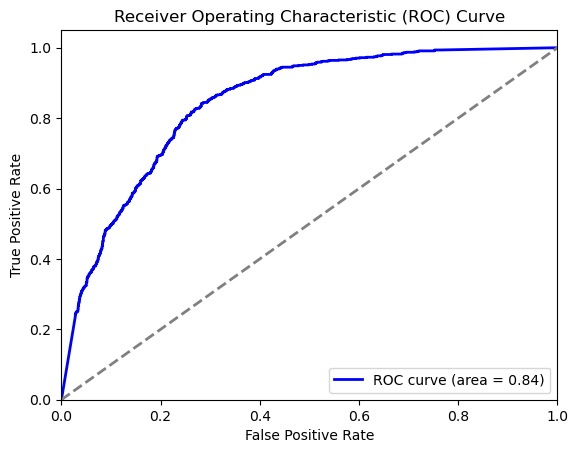

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_probs = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

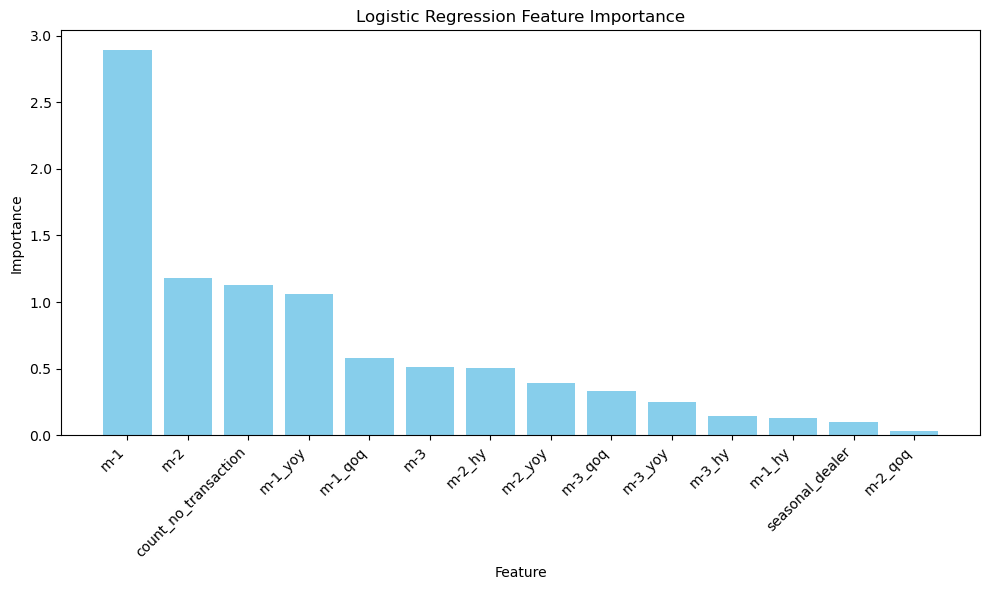

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = lr.coef_[0]

# Get the absolute values of the coefficients as feature importances
feature_importance = np.abs(coefficients)
feature_names= X_1.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame(
    {
        "Feature": feature_names,
        "Importance": feature_importance,
    }
)

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Plot the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"],
    color="skyblue",
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Logistic Regression Feature Importance")
plt.tight_layout()
plt.show()


In [84]:
X_1 =  X[['m-1', 'm-2', 'm-3' , 'm-1_qoq', 'm-2_qoq', 'm-3_qoq','m-1_hy', 'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy',
       'm-3_yoy','count_no_transaction', 'seasonal_dealer','sold_to_party_district_name']]
dummy_df = pd.get_dummies(X_1['sold_to_party_district_name'])
X_1 = pd.concat([X_1, dummy_df], axis=1)
y_1 = X['state_m'].replace({'Active': 0, 'Active_1N': 1})

In [85]:
X_1.drop('sold_to_party_district_name', axis = 1 , inplace = True)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2076  171]
 [ 315  463]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2247
           1       0.73      0.60      0.66       778

    accuracy                           0.84      3025
   macro avg       0.80      0.76      0.78      3025
weighted avg       0.83      0.84      0.83      3025



In [87]:
#with oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = LogisticRegression()
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1828  419]
 [ 165  613]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2247
           1       0.59      0.79      0.68       778

    accuracy                           0.81      3025
   macro avg       0.76      0.80      0.77      3025
weighted avg       0.83      0.81      0.81      3025



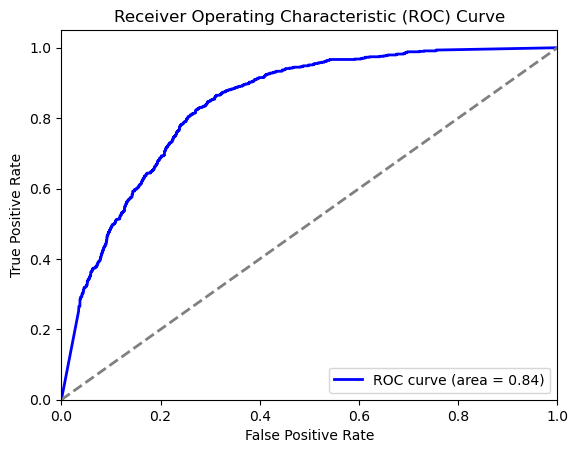

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_probs = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Model 2(A1N to A2N)

In [89]:
X_2 = X[X['state_m']=='Active_1N']
X_2 = X_2.merge(test['m-6'], left_index=True , right_index=True , how = 'inner')
y_2 = X_2['state_m+1'].replace({'Active': 0, 'Active_2N': 1 })
X_2 = X_2[['m-6','m-1', 'm-2', 'm-3' , 'm-1_qoq', 'm-2_qoq', 'm-3_qoq','m-1_hy', 'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy',
       'm-3_yoy','count_no_transaction','avg_discount','avg_pd']]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  3 140]
 [  4 660]]
              precision    recall  f1-score   support

           0       0.43      0.02      0.04       143
           1       0.82      0.99      0.90       664

    accuracy                           0.82       807
   macro avg       0.63      0.51      0.47       807
weighted avg       0.75      0.82      0.75       807



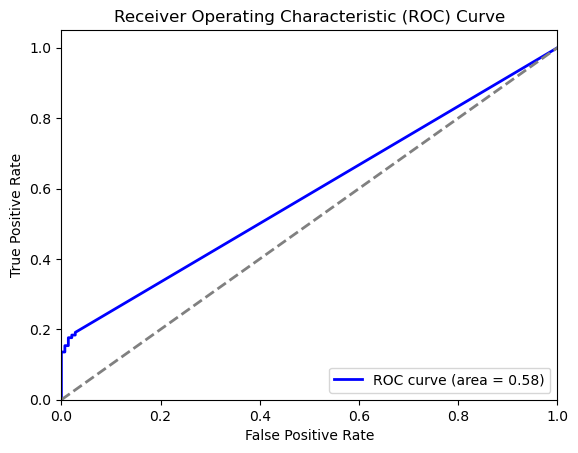

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_probs = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [92]:
#with oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = LogisticRegression()
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 92  51]
 [264 400]]
              precision    recall  f1-score   support

           0       0.26      0.64      0.37       143
           1       0.89      0.60      0.72       664

    accuracy                           0.61       807
   macro avg       0.57      0.62      0.54       807
weighted avg       0.78      0.61      0.66       807



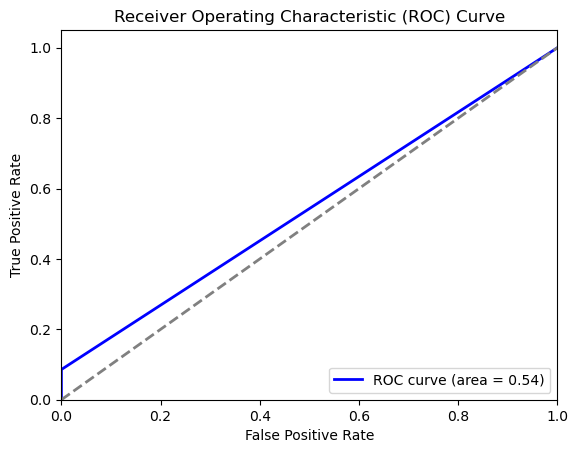

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_probs = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [94]:
#Adding district
X_2 = X[X['state_m']=='Active_1N']
X_2 = X_2.merge(test['m-6'], left_index=True , right_index=True , how = 'inner')
y_2 = X_2['state_m+1'].replace({'Active': 0, 'Active_2N': 1 })
X_2 = X_2[['m-6','m-1', 'm-2', 'm-3' , 'm-1_qoq', 'm-2_qoq', 'm-3_qoq','m-1_hy', 'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy',
       'm-3_yoy','count_no_transaction','avg_discount','avg_pd','sold_to_party_district_name']]
dummy_df = pd.get_dummies(X_2['sold_to_party_district_name'])
X_2 = pd.concat([X_2, dummy_df], axis=1)
X_2.drop('sold_to_party_district_name', axis = 1 , inplace = True)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 10 133]
 [ 35 629]]
              precision    recall  f1-score   support

           0       0.22      0.07      0.11       143
           1       0.83      0.95      0.88       664

    accuracy                           0.79       807
   macro avg       0.52      0.51      0.49       807
weighted avg       0.72      0.79      0.74       807



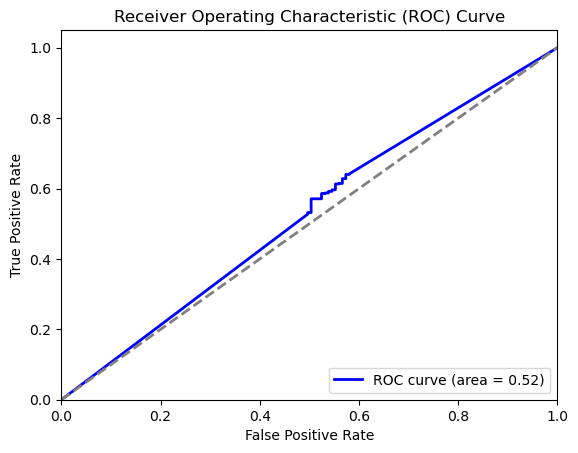

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_probs = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [97]:
#with oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = LogisticRegression()
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 56  87]
 [184 480]]
              precision    recall  f1-score   support

           0       0.23      0.39      0.29       143
           1       0.85      0.72      0.78       664

    accuracy                           0.66       807
   macro avg       0.54      0.56      0.54       807
weighted avg       0.74      0.66      0.69       807



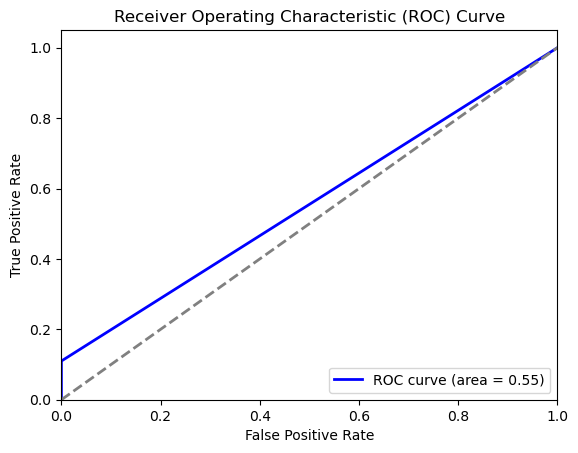

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_probs = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [99]:
#count_active_1n,2n,3n
status_columns = result_matrix_2.columns[1:]  # Exclude the "Identifier" column
for index, row in result_matrix_2.iterrows():
    row_counts = row[status_columns].value_counts()
    for status_col, count in row_counts.items():
        result_matrix_2.at[index, f"{status_col}_count"] = count

In [100]:
result_matrix_2 = result_matrix_2.fillna(0)

In [101]:
result_matrix_2.drop(['Active_count','-_count'], axis = 1 , inplace = True)

In [102]:
result_matrix_2

,m-12,m-11,m-10,m-9,m-8,m-7,m-6,m-5,m-4,m-3,m-2,m-1,Active_1N_count,Inactive_count,Active_2N_count,Active_3N_count,Churn_count
Sold To Party Code,,,,,,,,,,,,,,,,,
7000004,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,0.0,0.0,0.0,0.0,0.0
7000010,Active_1N,Active,Active,Active,Active,Active,Active_1N,Active,Active,Active_1N,Active,Active,2.0,0.0,0.0,0.0,0.0
7000015,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,0.0,0.0,0.0,0.0,0.0
7000022,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active_1N,Active,1.0,0.0,0.0,0.0,0.0
7000025,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,0.0,0.0,0.0,0.0,0.0
7036499,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,0.0,0.0,0.0,0.0,0.0
7036501,-,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,0.0,0.0,0.0,0.0,0.0


In [103]:
#Adding inactivity count
X = X.merge(result_matrix_2[['Active_1N_count','Active_2N_count','Active_3N_count','Inactive_count',
                            'Churn_count']], left_index=True , right_index=True , how = 'inner')

#### Model 2

In [104]:
X_3 = X[X['state_m']=='Active_1N']

X_4 = X_3[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy',
       'count_no_transaction', 'seasonal_dealer', 'sold_to_party_district_name', 'avg_discount', 'avg_pd',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count']]
y_4 = X_3['state_m+1'].replace({'Active': 0, 'Active_2N': 1 })

dummy_df = pd.get_dummies(X_4['sold_to_party_district_name'])
X_4 = pd.concat([X_4, dummy_df], axis=1)
X_4.drop('sold_to_party_district_name', axis = 1 , inplace = True)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 11  80]
 [ 15 383]]
              precision    recall  f1-score   support

           0       0.42      0.12      0.19        91
           1       0.83      0.96      0.89       398

    accuracy                           0.81       489
   macro avg       0.63      0.54      0.54       489
weighted avg       0.75      0.81      0.76       489



In [106]:
#with oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = LogisticRegression()
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 37  54]
 [106 292]]
              precision    recall  f1-score   support

           0       0.26      0.41      0.32        91
           1       0.84      0.73      0.78       398

    accuracy                           0.67       489
   macro avg       0.55      0.57      0.55       489
weighted avg       0.74      0.67      0.70       489



In [107]:
#with oversampling random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = RandomForestClassifier(class_weight='balanced_subsample')
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  9  82]
 [  8 390]]
              precision    recall  f1-score   support

           0       0.53      0.10      0.17        91
           1       0.83      0.98      0.90       398

    accuracy                           0.82       489
   macro avg       0.68      0.54      0.53       489
weighted avg       0.77      0.82      0.76       489



In [108]:
#oversampling with svc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
class_weights = {0: 3.0, 1: 1.0}
lr = SVC(kernel = 'rbf' , gamma='scale')
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 39  52]
 [118 280]]
              precision    recall  f1-score   support

           0       0.25      0.43      0.31        91
           1       0.84      0.70      0.77       398

    accuracy                           0.65       489
   macro avg       0.55      0.57      0.54       489
weighted avg       0.73      0.65      0.68       489



In [109]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
lr = xgb.XGBClassifier(
    n_estimators=1000,  # Number of boosting rounds (trees)
    max_depth=1000,        # Maximum depth of each tree
    learning_rate=0.00001,  # Step size shrinkage to prevent overfitting
    random_state=42
)
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 90   1]
 [391   7]]
              precision    recall  f1-score   support

           0       0.19      0.99      0.31        91
           1       0.88      0.02      0.03       398

    accuracy                           0.20       489
   macro avg       0.53      0.50      0.17       489
weighted avg       0.75      0.20      0.09       489



In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
lr = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.0001, max_depth=10000, random_state=42)
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 90   1]
 [392   6]]
              precision    recall  f1-score   support

           0       0.19      0.99      0.31        91
           1       0.86      0.02      0.03       398

    accuracy                           0.20       489
   macro avg       0.52      0.50      0.17       489
weighted avg       0.73      0.20      0.08       489



In [119]:
X.to_csv('data/training_data_1.csv')

In [111]:
#training the data using the state_m and state_m+1
X_5 = X[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy',
       'count_no_transaction', 'seasonal_dealer', 'sold_to_party_district_name', 'avg_discount', 'avg_pd',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count', 'Churn_count']]
y_5 = X[['state_m','state_m+1']].replace({'Active': 0, 'Active_1N': 1, 'Active_2N':1})

dummy_df = pd.get_dummies(X_5['sold_to_party_district_name'])
X_5 = pd.concat([X_5, dummy_df], axis=1)
X_5.drop('sold_to_party_district_name', axis = 1 , inplace = True)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
lr = DecisionTreeClassifier()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [113]:
y_pred = pd.DataFrame(y_pred, columns = ['state_m','state_m+1'])

In [114]:
y_pred['state_m'] = y_pred['state_m'].replace({0:'Active',1:'Active_1N'})

In [115]:
def statem1(y_pred):
    if y_pred['state_m+1']==0:
        return 'Active'
    if y_pred['state_m']=='Active' and y_pred['state_m+1']==1:
        return 'Active_1N'
    if y_pred['state_m']=='Active_1N' and y_pred['state_m+1']==1:
        return 'Active_2N'

In [116]:
y_pred['state_m+1'] = y_pred.apply(statem1, axis = 1)

In [117]:
y_test['state_m'] = y_test['state_m'].replace({0:'Active',1:'Active_1N'})
y_test['state_m+1'] = y_test.apply(statem1, axis = 1)

In [118]:
print(confusion_matrix(y_test['state_m'], y_pred['state_m']))
print(classification_report(y_test['state_m'], y_pred['state_m']))

[[1829  418]
 [ 206  572]]
              precision    recall  f1-score   support

      Active       0.90      0.81      0.85      2247
   Active_1N       0.58      0.74      0.65       778

    accuracy                           0.79      3025
   macro avg       0.74      0.77      0.75      3025
weighted avg       0.82      0.79      0.80      3025



In [119]:
y_pred.index = y_test.index
n = y_test[y_test['state_m']=='Active_1N']

In [120]:
m = y_pred[y_pred.index.isin(n.index)]

In [121]:
n

,state_m,state_m+1
7014225,Active_1N,Active_2N
7015174,Active_1N,Active_2N
7028587,Active_1N,Active
7025953,Active_1N,Active_2N
7036018,Active_1N,Active_2N
...,...,...
7033873,Active_1N,Active_2N
7024207,Active_1N,Active_2N
7028559,Active_1N,Active_2N
7035775,Active_1N,Active_2N


In [122]:
print(confusion_matrix(n['state_m+1'], m['state_m+1']))
print(classification_report(n['state_m+1'], m['state_m+1']))

[[ 53   5  69]
 [  0   0   0]
 [175  25 451]]
              precision    recall  f1-score   support

      Active       0.23      0.42      0.30       127
   Active_1N       0.00      0.00      0.00         0
   Active_2N       0.87      0.69      0.77       651

    accuracy                           0.65       778
   macro avg       0.37      0.37      0.36       778
weighted avg       0.76      0.65      0.69       778



In [123]:
#Oversampling and directly Active - 2N
X_5 = X[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy',
       'count_no_transaction', 'seasonal_dealer', 'sold_to_party_district_name', 'avg_discount', 'avg_pd',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count']]
y_5 = X['state_m+1'].replace({'Active': 0, 'Active_1N': 1, 'Active_2N':2})

dummy_df = pd.get_dummies(X_5['sold_to_party_district_name'])
X_5 = pd.concat([X_5, dummy_df], axis=1)
X_5.drop('sold_to_party_district_name', axis = 1 , inplace = True)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = RandomForestClassifier()
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 414  844 1016]
 [   9    8   83]
 [  13   14  624]]
              precision    recall  f1-score   support

           0       0.95      0.18      0.31      2274
           1       0.01      0.08      0.02       100
           2       0.36      0.96      0.53       651

    accuracy                           0.35      3025
   macro avg       0.44      0.41      0.28      3025
weighted avg       0.79      0.35      0.34      3025



In [125]:
X['state_m+1'].value_counts()

Active       6771
Active_2N    2054
Active_1N     340
Name: state_m+1, dtype: int64

In [126]:
y_pred

array([2, 2, 2, ..., 1, 1, 2])

#### Active to Active_2N

In [127]:
X_6 = X[X['state_m+1']!='Active_1N']

X_7 = X_6[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy',
       'count_no_transaction', 'seasonal_dealer', 
       'sold_to_party_district_name', 'avg_discount', 'avg_pd',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count', 'Churn_count','state_m']]
y_7 = X_6['state_m+1'].replace({'Active':0,'Active_2N':1}) 


In [128]:
dummy_df = pd.get_dummies(X_7['sold_to_party_district_name'])
X_7 = pd.concat([X_7, dummy_df], axis=1)
X_7.drop('sold_to_party_district_name', axis = 1 , inplace = True)

In [129]:
X_7['state_m'] = X_7['state_m'].replace({'Active':0,'Active_1N':1})

In [131]:
#X_train_1

In [132]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1 ,y_train_1, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

lr = RandomForestClassifier()
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'X_train_1' is not defined

In [1425]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
lr = xgb.XGBClassifier(
    n_estimators=1000,  # Number of boosting rounds (trees)
    max_depth=1000,        # Maximum depth of each tree
    learning_rate=0.00001,  # Step size shrinkage to prevent overfitting
    random_state=42
)
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2101  113]
 [  55  644]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2214
           1       0.85      0.92      0.88       699

    accuracy                           0.94      2913
   macro avg       0.91      0.94      0.92      2913
weighted avg       0.94      0.94      0.94      2913



In [1428]:
X_test.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy',
       ...
       'West Garo Hills', 'West Godavari', 'West Jaintia Hills', 'West Kameng',
       'West Khasi Hills', 'West Siang', 'West Tripura', 'Wokha',
       'YADADRI BHUVANAGIRI', 'YADGIR'],
      dtype='object', length=358)

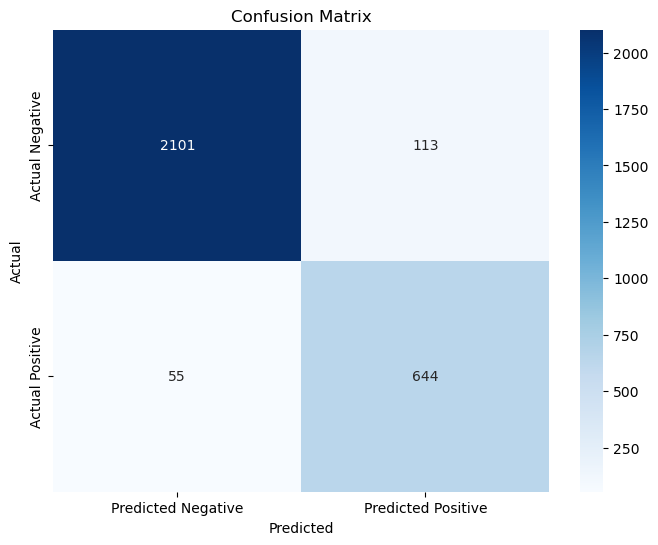

In [1426]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these with your actual predicted and true labels


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [1427]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:m-1_yoy: object, m-2_yoy: object, m-3_yoy: object

In [1404]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.98


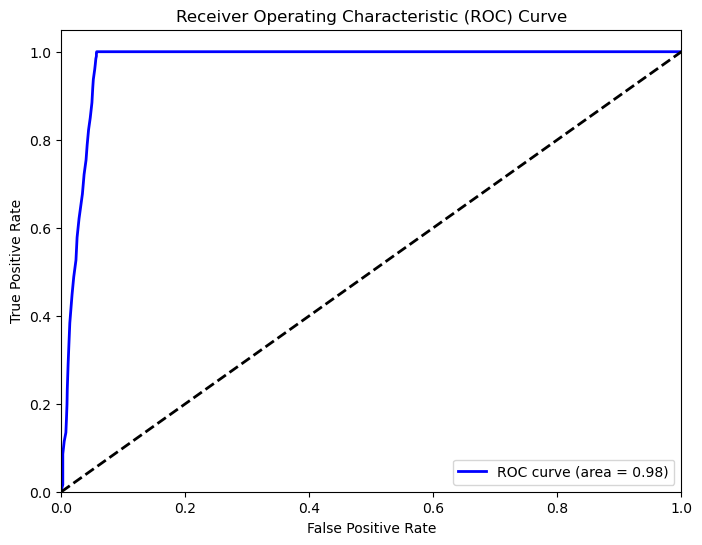

In [1409]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Validating Model with may data

In [133]:
pivot_2 = pivot[pivot['month_new_dealer']<=12]
pivot_2 = pivot_2.merge(result_matrix_1['20'], left_index = True , right_index = True , how = 'inner')

In [134]:
pivot_2 = pivot_2[pivot_2['20']=='Active']

In [135]:
pivot_2.columns

Index(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07', 'month_new_dealer', '20'],
      dtype='object')

In [136]:
val_data = pd.DataFrame()
val_data[['m-3','m-2','m-1']]=pivot_2[['2022-09', '2022-10', '2022-11']]

In [137]:
val_data['m-1_yoy'] = pivot_2['2022-11']-pivot_2['2021-11']
val_data['m-2_yoy'] = pivot_2['2022-10']-pivot_2['2021-10']
val_data['m-3_yoy'] = pivot_2['2022-09']-pivot_2['2021-09']
val_data['m-1_qoq'] = pivot_2['2022-11']-pivot_2['2022-08']
val_data['m-2_qoq'] = pivot_2['2022-10']-pivot_2['2022-07']
val_data['m-3_qoq'] = pivot_2['2022-09']-pivot_2['2022-06']
val_data['m-1_hy'] = pivot_2['2022-11']-pivot_2['2022-05']
val_data['m-2_hy'] = pivot_2['2022-10']-pivot_2['2022-04']
val_data['m-3_hy'] = pivot_2['2022-09']-pivot_2['2022-03']

In [138]:
pivot_3 = pivot_2[['2021-12','2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11']]

In [139]:
val_data['no_transaction'] = (pivot_3 == 0).astype(int).sum(axis=1) 

In [140]:
val_data = val_data.merge(X['seasonal_dealer'], left_index=True , right_index=True , how = 'left')

In [141]:
val_data = val_data.dropna()

In [142]:
discount_df['avg_discount'] = discount_df[['2021-12','2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11']].sum(axis = 1)/12

In [143]:
pd_df['avg_pd'] = pd_df[['2021-12','2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11']].sum(axis =1)/12

In [144]:
val_data = val_data.merge(discount_df['avg_discount'], left_index=True , 
                          right_index=True , how = 'left').merge(pd_df['avg_pd'],
                                                                left_index=True, right_index=True, how = 'left')

In [145]:
y_val = result_matrix_1[result_matrix_1['20']=='Active'][['21','22']]

In [146]:
y_val

,21,22
Sold To Party Code,,
7000004,Active,Active
7000015,Active_1N,Active_2N
7000022,Active,Active
7000025,Active,Active
7000027,Active,Active
...,...,...
7036491,Active,Active
7036499,Active,Active
7036501,Active,Active


In [147]:
val_matrix = result_matrix_1[['9','10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20']]

In [148]:
#count_active_1n,2n,3n
status_columns = val_matrix.columns[1:]  # Exclude the "Identifier" column
for index, row in val_matrix.iterrows():
    row_counts = row[status_columns].value_counts()
    for status_col, count in row_counts.items():
        val_matrix.at[index, f"{status_col}_count"] = count

In [149]:
val_matrix_1 = val_matrix[['Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count', 'Churn_count']]

In [150]:
val_data = val_data.merge(val_matrix_1, left_index=True , right_index=True , how = 'inner')

In [151]:
val_data = val_data.fillna(0)

In [152]:
val_data.drop('Churn_count', axis = 1 , inplace = True)

In [153]:
val_data = val_data.merge(X['sold_to_party_district_name'], left_index=True , right_index = True , how = 'inner')

In [154]:
val_data.drop('no_transaction', axis = 1 , inplace = True)

In [155]:
val_data.columns

Index(['m-3', 'm-2', 'm-1', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'm-1_qoq',
       'm-2_qoq', 'm-3_qoq', 'm-1_hy', 'm-2_hy', 'm-3_hy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'sold_to_party_district_name'],
      dtype='object')

In [156]:
X_train_1 = X[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer', 'avg_discount', 'avg_pd',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count']] 
y_train_1 = X['state_m'].replace({'Active':0, 'Active_1N':1})

In [157]:
X_val= val_data[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer', 'sold_to_party_district_name', 'avg_discount', 'avg_pd',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count']]
y_val = y_val[y_val.index.isin(X_val.index)]['21'].replace({'Active':0, 'Active_1N':1})

In [158]:
X_train_1.shape , X_val.shape

((9165, 19), (7304, 20))

In [159]:
from sklearn.preprocessing import LabelEncoder

In [160]:
le = LabelEncoder()
X_train_1['sold_to_party_district_name'] = le.fit_transform(X_train_1['sold_to_party_district_name'])
X_val['sold_to_party_district_name'] = le.fit_transform(X_val['sold_to_party_district_name'])

KeyError: 'sold_to_party_district_name'

In [517]:
#X_train_1.drop('sold_to_party_district_name', axis = 1 , inplace = True)
#X_val.drop('sold_to_party_district_name', axis =1 , inplace = True)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
lr =lr = xgb.XGBClassifier(
    n_estimators=1000,  # Number of boosting rounds (trees)
    max_depth=1000,        # Maximum depth of each tree
    learning_rate=0.00001,  # Step size shrinkage to prevent overfitting
    random_state=42
)
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1313  934]
 [ 129  649]]
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      2247
           1       0.41      0.83      0.55       778

    accuracy                           0.65      3025
   macro avg       0.66      0.71      0.63      3025
weighted avg       0.78      0.65      0.67      3025



In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
lr =LogisticRegression(max_iter=10000,)
lr.fit(X_res,y_res)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1829  418]
 [ 125  653]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2247
           1       0.61      0.84      0.71       778

    accuracy                           0.82      3025
   macro avg       0.77      0.83      0.79      3025
weighted avg       0.85      0.82      0.83      3025



In [164]:
y_pred_proba = lr.predict_proba(X_test_scaled)

In [165]:
y_pred_val_proba = lr.predict_proba(X_val_scaled)

NameError: name 'X_val_scaled' is not defined

In [385]:
y_pred_val_proba = pd.DataFrame(y_pred_val_proba[:,1], columns = ['probablity'])
y_val = pd.DataFrame(list(y_val), columns = ['labels'])
y_val_df = pd.concat([y_pred_val_proba, y_val], axis =1)

In [399]:
y_val_df[(y_val_df['labels']==1)&(y_val_df['probablity']>0.50)]

,probablity,labels
226,0.894171,1
244,0.659679,1
253,0.940366,1
260,0.603386,1
281,0.738462,1
...,...,...
7232,0.960145,1
7233,0.697364,1
7268,0.503100,1
7283,0.679579,1


In [397]:
y_val_df[y_val_df['probablity']>0.50]

,probablity,labels
3,0.909188,0
17,0.755720,0
26,0.551663,0
30,0.690991,0
51,0.837313,0
...,...,...
7280,0.648055,0
7283,0.679579,1
7284,0.563049,0
7286,0.870291,0


In [394]:
#list(y_val)

In [351]:
X_val_scaled = sc.fit_transform(X_val)
y_pred_val = lr.predict(X_val)

In [352]:
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

[[6899    0]
 [ 405    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6899
           1       0.00      0.00      0.00       405

    accuracy                           0.94      7304
   macro avg       0.47      0.50      0.49      7304
weighted avg       0.89      0.94      0.92      7304



In [525]:

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
#X_res, y_res = ros.fit_resample(X_train_scaled, y_train_1)
class_weights = {0: 1.0, 1: 4.0}
lr =SVC(class_weight=class_weights)
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1534  713]
 [  59  719]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80      2247
           1       0.50      0.92      0.65       778

    accuracy                           0.74      3025
   macro avg       0.73      0.80      0.72      3025
weighted avg       0.84      0.74      0.76      3025



In [403]:
y_train_1[y_train_1==1]

7000010    1
7000015    1
7000022    1
7000027    1
7000050    1
          ..
7036448    1
7036459    1
7036469    1
7036475    1
7036520    1
Name: state_m, Length: 2445, dtype: int64

In [410]:
pivot_2 = pivot[pivot['month_new_dealer']<=12]
pivot_2 = pivot_2.merge(result_matrix_1['20'], left_index = True , right_index = True , how = 'inner')

In [413]:
nov_data = pivot_2[pivot_2['20']=='Active']

In [417]:
cols = ['2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11']
nov_data = nov_data[cols]

In [572]:
nov_data['change_h2'] = (nov_data[['2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11']].sum(axis = 1)-nov_data[['2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05']].sum(axis =1))/nov_data[['2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05']].sum(axis =1)

In [573]:
def rating_level(number):
    if number < -0.6:
        return 0
    if number>=-0.6 and number < -0.2:
        return 1
    if number>=-0.2 and number < 0.2:
        return 2
    if number>=0.2 and number <0.6:
        return 3
    if number>=0.6:
        return 4

In [574]:
nov_data['change_h2'] = nov_data['change_h2'].apply(rating_level)

In [541]:
nov_data

,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,change_h2,21
Sold To Party Code,,,,,,,,,,,,,,
7000004,76.0,53.00,62.0,41.00,91.0,114.00,35.00,22.00,20.0,20.0,20.00,20.0,0,Active
7000015,50.0,44.50,15.0,70.50,27.0,75.50,100.00,42.00,54.5,45.0,74.00,27.0,3,Active_1N
7000025,60.0,85.00,54.0,140.00,60.0,100.00,161.00,175.00,75.0,95.0,48.00,108.8,3,Active
7000027,1235.0,688.35,430.5,1524.15,276.5,696.25,1222.15,226.25,513.0,5.0,171.95,207.5,1,Active
7000029,60.0,90.00,90.0,60.00,60.0,45.00,134.90,30.00,60.0,60.0,60.00,88.0,2,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036277,0.0,0.00,0.0,0.00,32.0,169.00,104.00,75.00,39.0,75.0,26.00,31.0,4,Active
7036279,0.0,0.00,0.0,0.00,24.0,144.00,86.00,74.00,67.0,65.0,30.00,61.0,4,Active
7036287,0.0,0.00,0.0,0.00,25.0,90.00,174.00,104.00,89.0,104.0,111.00,122.0,4,Active


In [543]:
X_val

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,m-2_yoy,m-3_yoy,seasonal_dealer,avg_discount,avg_pd,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count
7000004,20.0,20.00,20.0,0.0,-2.0,-15.00,-94.00,-71.00,-21.00,-5.0,-23.00,-54.5,0.0,25575.148759,12642.133958,0.0,0.0,0.0,0.0
7000015,27.0,74.00,45.0,-27.5,32.0,-55.00,-48.50,47.00,-25.50,-50.0,3.50,-23.5,0.0,29131.788639,12137.338958,0.0,0.0,0.0,0.0
7000025,108.8,48.00,95.0,33.8,-127.0,-66.00,8.80,-12.00,-45.00,-8.2,-59.00,-7.0,0.0,75830.962292,23034.238333,0.0,0.0,0.0,0.0
7000027,207.5,171.95,5.0,-305.5,-54.3,-1217.15,-488.75,-104.55,-1519.15,-184.0,-757.05,-997.5,0.0,463415.964548,153804.056250,0.0,0.0,0.0,0.0
7000029,88.0,60.00,60.0,28.0,30.0,-74.90,43.00,0.00,0.00,8.0,-25.00,-25.0,0.0,42548.029906,17497.828333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036272,8.0,20.00,38.0,8.0,-30.5,-52.00,-33.50,-5.00,38.00,8.0,20.00,38.0,1.0,5002.639167,0.000000,1.0,0.0,0.0,0.0
7036277,31.0,26.00,75.0,-8.0,-49.0,-29.00,-138.00,-6.00,75.00,31.0,26.00,75.0,0.0,20324.501908,8815.114167,0.0,0.0,0.0,0.0
7036279,61.0,30.00,65.0,-6.0,-44.0,-21.00,-83.00,6.00,65.00,61.0,30.00,65.0,0.0,50738.838200,35172.818889,0.0,0.0,0.0,0.0
7036287,122.0,111.00,104.0,33.0,7.0,-70.00,32.00,86.00,104.00,122.0,111.00,104.0,0.0,71391.066050,16440.222500,0.0,0.0,0.0,0.0


In [546]:
y_val = y_val['21'].replace({'Active':0, 'Active_1N':1})

In [549]:
X_val.shape , y_val.shape

((7304, 19), (7723,))

In [550]:
y_val = y_val[y_val.index.isin(X_val.index)]

In [551]:
X_val_scaled = sc.fit_transform(X_val)
y_pred = lr.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[5734 1165]
 [ 186  219]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6899
           1       0.16      0.54      0.24       405

    accuracy                           0.82      7304
   macro avg       0.56      0.69      0.57      7304
weighted avg       0.92      0.82      0.86      7304



In [554]:
y_pred_df = pd.DataFrame()
y_pred_df['Actual'] = y_val
y_pred_df['Predicted'] = y_pred

In [557]:
nov_data = nov_data.merge(y_pred_df, left_index=True , right_index=True , how = 'inner')

In [559]:
nov_data.columns

Index(['2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11',
       'change_h2', '21', 'Actual', 'Predicted'],
      dtype='object')

In [560]:
nov_data.drop(['change_h2', '21'], axis = 1 , inplace = True)

In [564]:
cols = ['2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']

In [565]:
nov_data[(nov_data['Actual']==0)&(nov_data['Predicted']==0)][cols].sum(axis=1).median()

959.6

In [566]:
nov_data[(nov_data['Actual']==0)&(nov_data['Predicted']==1)][cols].sum(axis=1).median()

373.0

In [567]:
nov_data[(nov_data['Actual']==1)&(nov_data['Predicted']==0)][cols].sum(axis=1).median()

299.5

In [568]:
nov_data[(nov_data['Actual']==1)&(nov_data['Predicted']==1)][cols].sum(axis=1).median()

209.35

In [570]:
nov_data['Actual'] = nov_data['Actual'].replace({1:'Active_1N',0:'Active'})
nov_data['Predicted'] = nov_data['Predicted'].replace({1:'Active_1N',0:'Active'})

In [577]:
nov_data['change_h2'] = nov_data['change_h2'].replace({0:'High_Fall',1:'Fall',2:'Same',3:'Rise',4:'High_Rise'})

In [579]:
nov_data

,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,Actual,Predicted,change_h2
Sold To Party Code,,,,,,,,,,,,,,,
7000004,76.0,53.00,62.0,41.00,91.0,114.00,35.00,22.00,20.0,20.0,20.00,20.0,Active,Active,High_Fall
7000015,50.0,44.50,15.0,70.50,27.0,75.50,100.00,42.00,54.5,45.0,74.00,27.0,Active_1N,Active,Rise
7000025,60.0,85.00,54.0,140.00,60.0,100.00,161.00,175.00,75.0,95.0,48.00,108.8,Active,Active,Rise
7000027,1235.0,688.35,430.5,1524.15,276.5,696.25,1222.15,226.25,513.0,5.0,171.95,207.5,Active,Active,Fall
7000029,60.0,90.00,90.0,60.00,60.0,45.00,134.90,30.00,60.0,60.0,60.00,88.0,Active,Active,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036272,0.0,0.00,0.0,0.00,25.0,41.50,90.00,50.50,0.0,38.0,20.00,8.0,Active_1N,Active,High_Rise
7036277,0.0,0.00,0.0,0.00,32.0,169.00,104.00,75.00,39.0,75.0,26.00,31.0,Active,Active_1N,High_Rise
7036279,0.0,0.00,0.0,0.00,24.0,144.00,86.00,74.00,67.0,65.0,30.00,61.0,Active,Active,High_Rise


In [580]:
nov_data.to_csv('november_active.csv')

In [581]:
nov_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7304 entries, 7000004 to 7036296
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   2021-12    7304 non-null   float64
 1   2022-01    7304 non-null   float64
 2   2022-02    7304 non-null   float64
 3   2022-03    7304 non-null   float64
 4   2022-04    7304 non-null   float64
 5   2022-05    7304 non-null   float64
 6   2022-06    7304 non-null   float64
 7   2022-07    7304 non-null   float64
 8   2022-08    7304 non-null   float64
 9   2022-09    7304 non-null   float64
 10  2022-10    7304 non-null   float64
 11  2022-11    7304 non-null   float64
 12  Actual     7304 non-null   object 
 13  Predicted  7304 non-null   object 
 14  change_h2  7304 non-null   object 
dtypes: float64(12), object(3)
memory usage: 913.0+ KB


In [582]:
nov_data

,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,Actual,Predicted,change_h2
Sold To Party Code,,,,,,,,,,,,,,,
7000004,76.0,53.00,62.0,41.00,91.0,114.00,35.00,22.00,20.0,20.0,20.00,20.0,Active,Active,High_Fall
7000015,50.0,44.50,15.0,70.50,27.0,75.50,100.00,42.00,54.5,45.0,74.00,27.0,Active_1N,Active,Rise
7000025,60.0,85.00,54.0,140.00,60.0,100.00,161.00,175.00,75.0,95.0,48.00,108.8,Active,Active,Rise
7000027,1235.0,688.35,430.5,1524.15,276.5,696.25,1222.15,226.25,513.0,5.0,171.95,207.5,Active,Active,Fall
7000029,60.0,90.00,90.0,60.00,60.0,45.00,134.90,30.00,60.0,60.0,60.00,88.0,Active,Active,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036272,0.0,0.00,0.0,0.00,25.0,41.50,90.00,50.50,0.0,38.0,20.00,8.0,Active_1N,Active,High_Rise
7036277,0.0,0.00,0.0,0.00,32.0,169.00,104.00,75.00,39.0,75.0,26.00,31.0,Active,Active_1N,High_Rise
7036279,0.0,0.00,0.0,0.00,24.0,144.00,86.00,74.00,67.0,65.0,30.00,61.0,Active,Active,High_Rise


In [426]:
result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==0].index)]['21'].value_counts()

Active       297
Active_1N     85
Name: 21, dtype: int64

In [427]:
result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==1].index)]['21'].value_counts()

Active       1870
Active_1N     121
Name: 21, dtype: int64

In [428]:
result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==2].index)]['21'].value_counts()

Active       2689
Active_1N      93
Name: 21, dtype: int64

In [429]:
result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==3].index)]['21'].value_counts()

Active       1104
Active_1N      41
Name: 21, dtype: int64

In [430]:
result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==4].index)]['21'].value_counts()

Active       1156
Active_1N     110
Name: 21, dtype: int64

In [433]:
85/(297+85)

0.22251308900523561

In [432]:
121/(1870+121)

0.06470588235294118

In [434]:
93/(2689+93)

0.03342918763479511

In [435]:
41/(1104+41)

0.03580786026200873

In [436]:
110/(1156+110)

0.08688783570300158

In [439]:
high_rise = nov_data[nov_data.index.isin(result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==4].index)]['21'].index)]

In [440]:
high_rise = high_rise.merge(result_matrix_1['21'], left_index=True , right_index=True , how = 'inner')

In [441]:
high_rise['21'].value_counts()

Active       1156
Active_1N     110
Name: 21, dtype: int64

In [470]:
high_rise[high_rise['21']=='Active_1N'].sum(axis = 1).median()

146.75

In [471]:
high_rise[high_rise['21']=='Active'].sum(axis = 1).median()

453.5

In [446]:
high_fall= nov_data[nov_data.index.isin(result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==0].index)]['21'].index)]


high_fall = high_fall.merge(result_matrix_1['21'], left_index=True , right_index=True , how = 'inner')

In [459]:
high_fall[high_fall['21']=='Active_1N'].sum(axis = 1).median()

276.5

In [460]:
high_fall[high_fall['21']=='Active'].sum(axis = 1).median()

492.70000000000005

In [449]:
fall= nov_data[nov_data.index.isin(result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==1].index)]['21'].index)]


fall = fall.merge(result_matrix_1['21'], left_index=True , right_index=True , how = 'inner')

In [461]:
fall[fall['21']=='Active_1N'].sum(axis = 1).median()

263.0

In [462]:
fall[fall['21']=='Active'].sum(axis = 1).median()

815.0

In [452]:
same= nov_data[nov_data.index.isin(result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==2].index)]['21'].index)]


same = same.merge(result_matrix_1['21'], left_index=True , right_index=True , how = 'inner')

In [463]:
same[same['21']=='Active_1N'].sum(axis = 1).median()

274.0

In [464]:
same[same['21']=='Active'].sum(axis = 1).median()

1185.4

In [467]:
rise= nov_data[nov_data.index.isin(result_matrix_1[result_matrix_1.index.isin(nov_data[nov_data['change_h2']==3].index)]['21'].index)]


rise = rise.merge(result_matrix_1['21'], left_index=True , right_index=True , how = 'inner')

In [468]:
rise[rise['21']=='Active_1N'].sum(axis = 1).median()

237.0

In [469]:
rise[rise['21']=='Active'].sum(axis = 1).median()

877.575

In [472]:
nov_data_1 = nov_data[nov_data['change_h2'].isin([0,1,4])]

In [476]:
X_val = X_val[X_val.index.isin(nov_data_1.index)]

In [483]:
y_val = y_val[y_val.index.isin(nov_data_1.index)]

In [485]:
y_val['21'].value_counts()

Active       3323
Active_1N     316
Name: 21, dtype: int64

In [488]:
X_val.drop('sold_to_party_district_name', axis =1 , inplace = True)

In [502]:
y_val = y_val[y_val.index.isin(X_val.index)]


In [504]:
y_val_1 = y_val['21'].replace({'Active':0, 'Active_1N':1})

In [166]:
X_val_scaled = sc.fit_transform(X_val)

ValueError: could not convert string to float: 'BHADRAK'

In [589]:
X_val

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,m-2_yoy,m-3_yoy,seasonal_dealer,avg_discount,avg_pd,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count
7000004,20.0,20.00,20.0,0.0,-2.0,-15.00,-94.00,-71.00,-21.00,-5.0,-23.00,-54.5,0.0,25575.148759,12642.133958,0.0,0.0,0.0,0.0
7000015,27.0,74.00,45.0,-27.5,32.0,-55.00,-48.50,47.00,-25.50,-50.0,3.50,-23.5,0.0,29131.788639,12137.338958,0.0,0.0,0.0,0.0
7000025,108.8,48.00,95.0,33.8,-127.0,-66.00,8.80,-12.00,-45.00,-8.2,-59.00,-7.0,0.0,75830.962292,23034.238333,0.0,0.0,0.0,0.0
7000027,207.5,171.95,5.0,-305.5,-54.3,-1217.15,-488.75,-104.55,-1519.15,-184.0,-757.05,-997.5,0.0,463415.964548,153804.056250,0.0,0.0,0.0,0.0
7000029,88.0,60.00,60.0,28.0,30.0,-74.90,43.00,0.00,0.00,8.0,-25.00,-25.0,0.0,42548.029906,17497.828333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036272,8.0,20.00,38.0,8.0,-30.5,-52.00,-33.50,-5.00,38.00,8.0,20.00,38.0,1.0,5002.639167,0.000000,1.0,0.0,0.0,0.0
7036277,31.0,26.00,75.0,-8.0,-49.0,-29.00,-138.00,-6.00,75.00,31.0,26.00,75.0,0.0,20324.501908,8815.114167,0.0,0.0,0.0,0.0
7036279,61.0,30.00,65.0,-6.0,-44.0,-21.00,-83.00,6.00,65.00,61.0,30.00,65.0,0.0,50738.838200,35172.818889,0.0,0.0,0.0,0.0
7036287,122.0,111.00,104.0,33.0,7.0,-70.00,32.00,86.00,104.00,122.0,111.00,104.0,0.0,71391.066050,16440.222500,0.0,0.0,0.0,0.0


In [591]:
y_pred = lr.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[5734 1165]
 [ 186  219]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6899
           1       0.16      0.54      0.24       405

    accuracy                           0.82      7304
   macro avg       0.56      0.69      0.57      7304
weighted avg       0.92      0.82      0.86      7304



In [495]:
X_val.shape

(3453, 19)

In [501]:
y_val['21'].value_counts()

Active       3173
Active_1N     280
Name: 21, dtype: int64

In [529]:
nov_data = nov_data.merge(result_matrix_1['21'], left_index=True , right_index=True , how = 'inner')

In [530]:
nov_data.columns

Index(['2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11',
       'change_h2', '21'],
      dtype='object')

In [531]:
active = nov_data[nov_data['21']=='Active']

In [532]:
active.columns

Index(['2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11',
       'change_h2', '21'],
      dtype='object')

In [533]:
active[['2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']].sum(axis =1).median()

842.525

In [534]:
active_1N = nov_data[nov_data['21']=='Active_1N']
active_1N[['2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']].sum(axis =1).median()

242.5

In [594]:
test['avg_sales'] = test[['m-1', 'm-2', 'm-3', 'm-4', 'm-5', 'm-6', 'm-7', 'm-8', 'm-9', 'm-10',
       'm-11', 'm-12']].mean(axis =1)

In [1439]:
X_train_1 = X_train_1.merge(test['avg_sales'], left_index=True, right_index=True, how = 'inner')

In [604]:
nov_data['avg_sales'] = nov_data[['2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']].mean(axis =1)

In [605]:
X_val = X_val.merge(nov_data['avg_sales'],left_index=True , right_index=True , how='inner')

In [1440]:
X_train_1.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales'],
      dtype='object')

In [609]:
X_val.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales'],
      dtype='object')

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE ,RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
#ros = RandomOverSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
class_weights = {0: 1.0, 1: 2.0}
lr =SVC(probability=True, class_weight=class_weights)
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1903  344]
 [ 196  582]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2247
           1       0.63      0.75      0.68       778

    accuracy                           0.82      3025
   macro avg       0.77      0.80      0.78      3025
weighted avg       0.84      0.82      0.83      3025



In [654]:
X_val['change_h2'] = nov_data['change_h2']
X_val['state_m']=y_val

In [660]:
X_val_2 = X_val[X_val['change_h2'].isin(['High_Fall','Fall','High_Rise'])]
y_val_2 = X_val_2['state_m']

In [661]:
X_val_2.drop(['change_h2','state_m'], axis = 1 , inplace = True)

In [657]:
X_val_scaled = sc.fit_transform(X_val_2)
y_pred = lr.predict(X_val_scaled)
print(confusion_matrix(y_val_2, y_pred))
print(classification_report(y_val_2, y_pred))

[[1950  143]
 [ 129   64]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2093
           1       0.31      0.33      0.32       193

    accuracy                           0.88      2286
   macro avg       0.62      0.63      0.63      2286
weighted avg       0.88      0.88      0.88      2286



In [302]:
test['avg_sales'] = test.sum(axis =1)
X_train_1 = X_train_1.merge(test['avg_sales'],left_index=True , right_index=True , how = 'inner')

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
class_weights = {0: 0.6, 1: 5.0}
lr_1 =LogisticRegression(max_iter=10000,class_weight=class_weights)
lr_1.fit(X_train_scaled,y_train)
y_pred = lr_1.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 916 1331]
 [  14  764]]
              precision    recall  f1-score   support

           0       0.98      0.41      0.58      2247
           1       0.36      0.98      0.53       778

    accuracy                           0.56      3025
   macro avg       0.67      0.69      0.55      3025
weighted avg       0.83      0.56      0.57      3025



In [304]:
X_val_scaled = sc.fit_transform(X_val.drop(['change_h2','state_m'],axis =1))
y_pred_1 = lr_1.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_1))
print(classification_report(y_val, y_pred_1))

KeyError: "['change_h2', 'state_m'] not found in axis"

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
class_weights = {0: 2.0, 1: 1.4}
lr_2 =LogisticRegression(max_iter=10000,class_weight=class_weights)
lr_2.fit(X_train_scaled,y_train)
y_pred = lr_2.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2129  118]
 [ 376  402]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2247
           1       0.77      0.52      0.62       778

    accuracy                           0.84      3025
   macro avg       0.81      0.73      0.76      3025
weighted avg       0.83      0.84      0.82      3025



In [710]:
X_val_scaled = sc.fit_transform(X_val.drop(['change_h2','state_m'],axis =1))
y_pred_2 = lr_2.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_2))
print(classification_report(y_val, y_pred_2))

[[6625  274]
 [ 298  107]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6899
           1       0.28      0.26      0.27       405

    accuracy                           0.92      7304
   macro avg       0.62      0.61      0.62      7304
weighted avg       0.92      0.92      0.92      7304



In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE ,RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = RandomOverSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 1.0, 1: 2.0}
knn =KNeighborsClassifier(n_neighbors=20 , weights='distance')
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2037  210]
 [ 272  506]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2247
           1       0.71      0.65      0.68       778

    accuracy                           0.84      3025
   macro avg       0.79      0.78      0.79      3025
weighted avg       0.84      0.84      0.84      3025



In [723]:
X_val_scaled = sc.fit_transform(X_val.drop(['change_h2','state_m'],axis =1))
y_pred_knn= knn.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_knn))
print(classification_report(y_val, y_pred_knn))

[[6493  406]
 [ 266  139]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6899
           1       0.26      0.34      0.29       405

    accuracy                           0.91      7304
   macro avg       0.61      0.64      0.62      7304
weighted avg       0.92      0.91      0.91      7304



In [169]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE ,RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
#ros = RandomOverSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 1.0, 1: 2.0}
nb =GaussianNB()
nb.fit(X_train_scaled,y_train)
y_pred = nb.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 820 1427]
 [  47  731]]
              precision    recall  f1-score   support

           0       0.95      0.36      0.53      2247
           1       0.34      0.94      0.50       778

    accuracy                           0.51      3025
   macro avg       0.64      0.65      0.51      3025
weighted avg       0.79      0.51      0.52      3025



In [170]:
X_val_scaled = sc.fit_transform(X_val.drop(['change_h2','state_m'],axis =1))
y_pred_nb= nb.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))

KeyError: "['change_h2', 'state_m'] not found in axis"

In [171]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE ,RandomOverSampler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
#ros = RandomOverSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 1.0, 1: 2.0}
bnb =BernoulliNB()
bnb.fit(X_train_scaled,y_train)
y_pred = bnb.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1502  745]
 [ 136  642]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      2247
           1       0.46      0.83      0.59       778

    accuracy                           0.71      3025
   macro avg       0.69      0.75      0.68      3025
weighted avg       0.80      0.71      0.73      3025



In [174]:
X_val_scaled = sc.fit_transform(X_val)
y_pred_bnb= bnb.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_bnb))
print(classification_report(y_val, y_pred_bnb))

ValueError: could not convert string to float: 'BHADRAK'

In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
dt = DecisionTreeClassifier()

dt.fit(X_train_scaled,y_train)
y_pred = dt.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1778  469]
 [ 202  576]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      2247
           1       0.55      0.74      0.63       778

    accuracy                           0.78      3025
   macro avg       0.72      0.77      0.74      3025
weighted avg       0.81      0.78      0.79      3025



In [802]:
X_val_scaled = sc.fit_transform(X_val.drop(['change_h2','state_m'],axis =1))
y_pred_dt= dt.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))

[[4878 2021]
 [ 208  197]]
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      6899
           1       0.09      0.49      0.15       405

    accuracy                           0.69      7304
   macro avg       0.52      0.60      0.48      7304
weighted avg       0.91      0.69      0.78      7304



In [652]:
X_train_1['m-1_yoy'] = X_train['m-1_yoy'].astype('int')
X_train_1['m-2_yoy'] = X_train['m-2_yoy'].astype('int')
X_train_1['m-3_yoy'] = X_train['m-3_yoy'].astype('int')

In [658]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
class_weights = {0: 1.0, 1: 3.0}
xg = xgb.XGBClassifier(
    n_estimators=10000,  # Number of boosting rounds (trees)
    max_depth=10000,        # Maximum depth of each tree
    learning_rate=0.000001,  # Step size shrinkage to prevent overfitting
    random_state=42,
    #class_weights = class_weights
    
)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2109  138]
 [ 468  310]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2247
           1       0.69      0.40      0.51       778

    accuracy                           0.80      3025
   macro avg       0.76      0.67      0.69      3025
weighted avg       0.79      0.80      0.78      3025



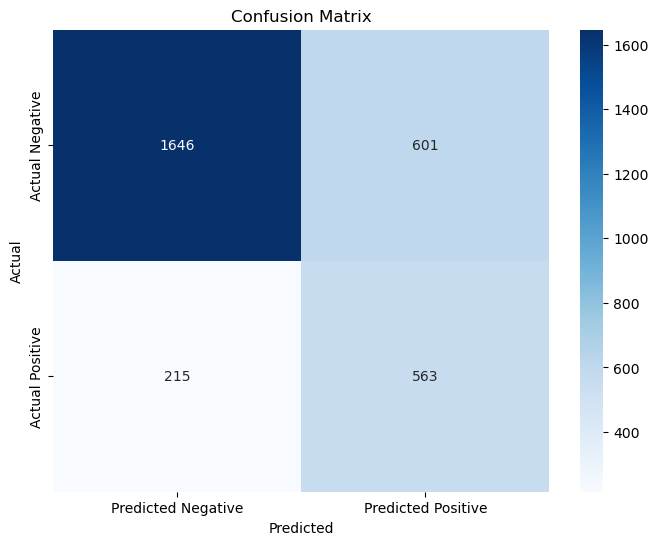

In [1445]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these with your actual predicted and true labels


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [1446]:
y_pred_prob = xg.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.78


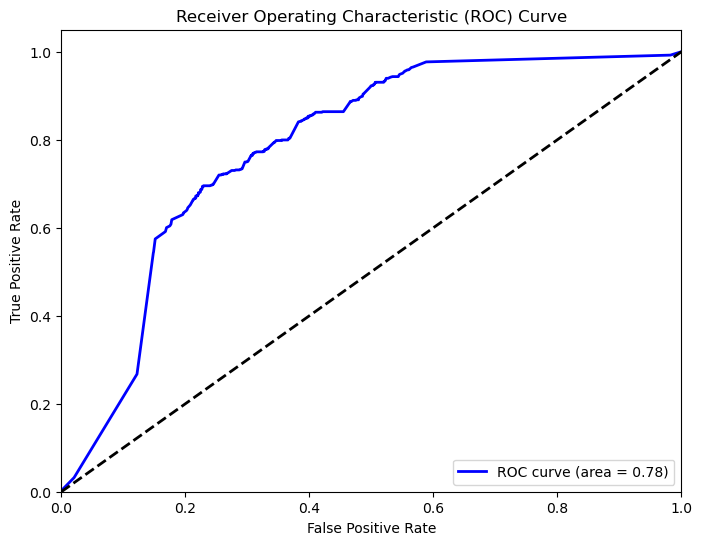

In [1447]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [903]:
778/3025

0.2571900826446281

In [904]:
y['state_m'].value_counts()

Active       6972
Active_1N    3040
Name: state_m, dtype: int64

In [733]:
X_val_scaled = sc.fit_transform(X_val.drop(['change_h2','state_m'],axis =1))
y_pred_xg= xg.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_xg))
print(classification_report(y_val, y_pred_xg))

[[5853 1046]
 [ 233  172]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      6899
           1       0.14      0.42      0.21       405

    accuracy                           0.82      7304
   macro avg       0.55      0.64      0.56      7304
weighted avg       0.92      0.82      0.86      7304



In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
rf = RandomForestClassifier()

rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1918  329]
 [ 169  609]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2247
           1       0.65      0.78      0.71       778

    accuracy                           0.84      3025
   macro avg       0.78      0.82      0.80      3025
weighted avg       0.85      0.84      0.84      3025



In [299]:
X_train_1

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,m-2_yoy,m-3_yoy,seasonal_dealer,avg_discount,avg_pd,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count
7000004,155.00,90.00,75.0,32.50,70.00,55.0,135.00,70.00,53.00,-255.5,312.0,119.5,0.0,37510.161383,12538.050625,0.0,0.0,0.0,0.0
7000010,12.00,33.80,0.0,-5.00,8.80,0.0,-13.00,9.80,-25.00,16.0,25.0,26.0,0.0,10351.612500,5600.508333,2.0,0.0,0.0,0.0
7000015,27.00,74.00,45.0,-27.50,32.00,-55.0,-48.50,47.00,-25.50,11.0,-32.5,8.5,0.0,30478.045584,12748.755625,0.0,0.0,0.0,0.0
7000022,29.00,0.00,24.0,8.00,-5.00,2.0,5.00,-12.00,12.00,0.0,0.0,0.0,0.0,4375.058544,1412.851042,1.0,0.0,0.0,0.0
7000025,173.00,137.00,167.0,100.00,28.20,119.0,78.00,62.00,-8.00,-76.0,-98.5,-5.0,0.0,82209.560164,23659.155000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,91.05,69.95,92.0,15.85,-16.85,21.7,36.05,6.95,-8.00,0.0,0.0,0.0,0.0,42707.654364,18358.485000,0.0,0.0,0.0,0.0
7036499,170.00,195.00,34.2,119.50,96.00,-66.3,67.00,169.50,-88.80,0.0,0.0,0.0,0.0,31828.243075,1523.666667,0.0,0.0,0.0,0.0
7036501,1055.00,423.00,1005.5,953.00,282.00,904.5,946.00,416.00,990.50,0.0,0.0,0.0,0.0,296070.413055,101996.834417,0.0,0.0,0.0,0.0
7036508,77.00,50.50,40.0,11.00,10.50,10.0,22.00,-6.00,-38.45,0.0,0.0,0.0,0.0,18637.833183,8691.048333,0.0,0.0,0.0,0.0


In [737]:
X_val_scaled = sc.fit_transform(X_val.drop(['change_h2','state_m'],axis =1))
y_pred_rf= rf.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

[[5216 1683]
 [ 110  295]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      6899
           1       0.15      0.73      0.25       405

    accuracy                           0.75      7304
   macro avg       0.56      0.74      0.55      7304
weighted avg       0.93      0.75      0.82      7304



In [740]:
predicted_df = pd.DataFrame()
predicted_df['lr_1'] = y_pred_1

In [742]:
predicted_df['lr_2'] = y_pred_2
predicted_df['knn'] = y_pred_knn
predicted_df['nb'] = y_pred_nb
predicted_df['bnb'] = y_pred_bnb
predicted_df['rf'] = y_pred_rf
predicted_df['xgb'] = y_pred_xg

In [746]:
predicted_df.index = y_val.index

In [747]:
predicted_df['actual'] = y_val

In [749]:
predicted_df.columns

Index(['lr_1', 'lr_2', 'knn', 'nb', 'bnb', 'rf', 'xgb', 'actual'], dtype='object')

In [811]:
predicted_df['ensemble_predicted'] = predicted_df[['lr_1','lr_2', 'knn', 'nb', 'bnb', 'rf', 'xgb']].mode(axis =1)

In [898]:
predicted_df

,lr_1,lr_2,knn,nb,bnb,rf,xgb,actual,ensemble_predicted,cluster
Sold To Party Code,,,,,,,,,,
7000004,1,0,0,1,0,1,1,0,1,0
7000015,0,0,0,1,0,0,0,1,0,0
7000025,0,0,0,1,0,0,0,0,0,0
7000027,1,1,1,0,0,0,1,0,1,1
7000029,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7036272,1,0,1,1,1,1,0,1,1,0
7036277,1,0,0,1,0,0,0,0,0,0
7036279,0,0,0,1,0,0,0,0,0,0


In [809]:
def pred(x):
    if x>4:
        return 1
    else:
        return 0
predicted_df['ensemble_predicted'] = predicted_df['ensemble_predicted'].apply(pred)

In [812]:
print(confusion_matrix(predicted_df['actual'],predicted_df['ensemble_predicted']))
print(classification_report(predicted_df['actual'],predicted_df['ensemble_predicted']))

[[6209  690]
 [ 203  202]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      6899
           1       0.23      0.50      0.31       405

    accuracy                           0.88      7304
   macro avg       0.60      0.70      0.62      7304
weighted avg       0.93      0.88      0.90      7304



In [870]:
y_val_2 = result_matrix_1[result_matrix_1.index.isin(X_val.index)]['22'].replace({'Active':0 , 'Active_1N':1,
                                                                                 'Active_2N':1})

In [850]:
y_val_2

Sold To Party Code
7000004    0
7000015    2
7000025    0
7000027    0
7000029    0
          ..
7036272    2
7036277    0
7036279    0
7036287    0
7036296    0
Name: 22, Length: 7304, dtype: int64

In [851]:
X_val['state_m'] = predicted_df['ensemble_predicted']

In [862]:
X_train_1 = X_train_1.merge(y['state_m'].replace({'Active':0,'Active_1N':1}),left_index=True , right_index=True , how = 'inner')

In [869]:
y_train_2 = y[['state_m+1']].replace({'Active':0,'Active_1N':1,'Active_2N':1})

In [872]:
y_train_2 = y_train_2[y_train_2.index.isin(X_train_1.index)]

In [873]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_2, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
rf_1 = RandomForestClassifier()

rf_1.fit(X_res,y_res)
y_pred = rf_1.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1811  463]
 [  49  702]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2274
           1       0.60      0.93      0.73       751

    accuracy                           0.83      3025
   macro avg       0.79      0.87      0.80      3025
weighted avg       0.88      0.83      0.84      3025



In [861]:
#X_train_1.drop(['state_m_x','state_m_y'],axis =1 , inplace= True)

In [874]:
X_val_scaled = sc.fit_transform(X_val.drop('change_h2',axis =1))
y_pred_rf_1= rf_1.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_rf_1))
print(classification_report(y_val, y_pred_rf_1))

[[1895 5004]
 [  69  336]]
              precision    recall  f1-score   support

           0       0.96      0.27      0.43      6899
           1       0.06      0.83      0.12       405

    accuracy                           0.31      7304
   macro avg       0.51      0.55      0.27      7304
weighted avg       0.91      0.31      0.41      7304



In [847]:
X_val.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', 'change_h2',
       'state_m'],
      dtype='object')

In [657]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
xg_1 = xgb.XGBClassifier(
    n_estimators=1000,  # Number of boosting rounds (trees)
    max_depth=1000,        # Maximum depth of each tree
    learning_rate=0.00001,  # Step size shrinkage to prevent overfitting
    random_state=42,
    
)
xg_1.fit(X_train,y_train)
y_pred = xg_1.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2109  138]
 [ 468  310]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2247
           1       0.69      0.40      0.51       778

    accuracy                           0.80      3025
   macro avg       0.76      0.67      0.69      3025
weighted avg       0.79      0.80      0.78      3025



In [876]:
X_val_scaled = sc.fit_transform(X_val.drop('change_h2',axis =1))
y_pred_xg_1= xg_1.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_xg_1))
print(classification_report(y_val, y_pred_xg_1))

[[1302 5597]
 [ 126  279]]
              precision    recall  f1-score   support

           0       0.91      0.19      0.31      6899
           1       0.05      0.69      0.09       405

    accuracy                           0.22      7304
   macro avg       0.48      0.44      0.20      7304
weighted avg       0.86      0.22      0.30      7304



In [280]:
#X_train_1.drop('state_m',axis = 1, inplace = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
lr_1 = LogisticRegression()
lr_1.fit(X_train,y_train)
y_pred = lr_1.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 779 1468]
 [  16  762]]
              precision    recall  f1-score   support

           0       0.98      0.35      0.51      2247
           1       0.34      0.98      0.51       778

    accuracy                           0.51      3025
   macro avg       0.66      0.66      0.51      3025
weighted avg       0.82      0.51      0.51      3025



In [878]:
X_val_scaled = sc.fit_transform(X_val.drop('change_h2',axis =1))
y_pred_lr_1= lr_1.predict(X_val_scaled)
print(confusion_matrix(y_val, y_pred_xg_1))
print(classification_report(y_val, y_pred_xg_1))

[[1302 5597]
 [ 126  279]]
              precision    recall  f1-score   support

           0       0.91      0.19      0.31      6899
           1       0.05      0.69      0.09       405

    accuracy                           0.22      7304
   macro avg       0.48      0.44      0.20      7304
weighted avg       0.86      0.22      0.30      7304



### Adding the Active_1N dealers for the month of Sep, Oct , Nov

In [926]:
pivot_4 = pivot.merge(pivot_prev,left_index=True,right_index=True ,how ='inner')

In [928]:
pivot_4 = pivot_4.merge(result_matrix_1[['19','20']], left_index=True , right_index = True , how = 'inner')

In [932]:
oct_1N = pivot_4[pivot_4['20']=='Active_1N']

In [938]:
val_oct = pd.DataFrame()
val_oct[['m-1','m-2','m-3']] = oct_1N[['2022-10','2022-09','2022-08']]
val_oct['m-1_qoq'] = oct_1N['2022-10']-oct_1N['2022-07']
val_oct['m-2_qoq'] = oct_1N['2022-09']-oct_1N['2022-06']
val_oct['m-3_qoq'] = oct_1N['2022-08']-oct_1N['2022-05']
val_oct['m-1_hy'] = oct_1N['2022-10']-oct_1N['2022-04']
val_oct['m-2_hy'] = oct_1N['2022-09']-oct_1N['2022-03']
val_oct['m-3_hy'] = oct_1N['2022-08']-oct_1N['2022-02']
val_oct['m-1_yoy'] = oct_1N['2022-10']-oct_1N['2021-10']
val_oct['m-2_yoy'] = oct_1N['2022-09']-oct_1N['2021-09']
val_oct['m-3_yoy'] = oct_1N['2022-08']-oct_1N['2021-08']

In [940]:
oct_discount = discount_df[discount_df.index.isin(val_oct.index)]
oct_pd = pd_df[pd_df.index.isin(val_oct.index)]

In [949]:
val_oct['seasonal_dealer']=0

In [950]:
oct_discount['avg_discount'] = oct_discount[['2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10']].mean(axis = 1)
oct_pd['avg_pd'] = oct_pd[['2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10']].mean(axis = 1)

In [951]:
val_oct=val_oct.merge(oct_discount['avg_discount'],left_index=True,
                     right_index=True, how = 'inner').merge(oct_pd['avg_pd'],left_index = True,
                                                           right_index=True , how = 'inner')

In [956]:
oct_1N['avg_sales'] = oct_1N[['2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10']].mean(axis =1 )

In [975]:
oct_1N_result = result_matrix_1[result_matrix_1.index.isin(val_oct.index)]


In [976]:
oct_1N_result = oct_1N_result[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19']]

In [962]:
#count_active_1n,2n,3n
status_columns = oct_1N_result.columns[1:]  # Exclude the "Identifier" column
for index, row in oct_1N_result.iterrows():
    row_counts = row[status_columns].value_counts()
    for status_col, count in row_counts.items():
        oct_1N_result.at[index, f"{status_col}_count"] = count

In [965]:
oct_1N_result = oct_1N_result[['Active_count','Active_1N_count', 'Active_2N_count', 'Inactive_count',
       'Active_3N_count']]

In [966]:
val_oct = val_oct.merge(oct_1N_result, left_index = True , right_index = True , how = 'inner')

In [968]:
val_oct = val_oct.fillna(0)

In [970]:
val_oct.shape

(354, 20)

In [984]:
X_val_1 = X_val.drop('change_h2', axis =1 )

In [1004]:
X_val_1['state_m'] = y_val

In [982]:
val_oct['state_m'] = 1

In [989]:
val_oct['avg_sales'] = oct_1N['avg_sales']

In [990]:
val_oct.drop('Active_count', axis = 1 , inplace = True)

In [1005]:
val_oct = val_oct[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', 'state_m']]

In [1006]:
X_val_2 = pd.concat([X_val_1 , val_oct], axis = 0)

In [1007]:
X_val_2

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,m-3_yoy,seasonal_dealer,avg_discount,avg_pd,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,state_m
7000004,20.0,20.00,20.00,0.0,-2.00,-15.00,-94.00,-71.00,-21.00,-5.0,...,-54.50,0.0,25575.148759,12642.133958,0.0,0.0,0.0,0.0,47.833333,0
7000015,27.0,74.00,45.00,-27.5,32.00,-55.00,-48.50,47.00,-25.50,-50.0,...,-23.50,0.0,29131.788639,12137.338958,0.0,0.0,0.0,0.0,52.083333,1
7000025,108.8,48.00,95.00,33.8,-127.00,-66.00,8.80,-12.00,-45.00,-8.2,...,-7.00,0.0,75830.962292,23034.238333,0.0,0.0,0.0,0.0,96.816667,0
7000027,207.5,171.95,5.00,-305.5,-54.30,-1217.15,-488.75,-104.55,-1519.15,-184.0,...,-997.50,0.0,463415.964548,153804.056250,0.0,0.0,0.0,0.0,599.716667,0
7000029,88.0,60.00,60.00,28.0,30.00,-74.90,43.00,0.00,0.00,8.0,...,-25.00,0.0,42548.029906,17497.828333,0.0,0.0,0.0,0.0,69.825000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033470,12.0,13.00,23.00,12.0,0.00,-2.00,-26.00,0.00,-3.00,-25.0,...,0.00,0.0,19565.865761,16191.626061,2.0,0.0,0.0,0.0,16.000000,1
7033526,26.0,0.00,0.00,26.0,0.00,0.00,0.00,-26.00,0.00,26.0,...,-26.00,0.0,13287.344471,10069.287879,5.0,3.0,2.0,2.0,8.666667,1
7033537,15.0,15.00,15.00,12.5,15.00,15.00,7.50,5.00,14.00,15.0,...,15.00,0.0,5669.853919,4327.212727,4.0,1.0,0.0,0.0,7.166667,1
7033546,80.5,60.50,63.35,10.3,-109.05,-54.65,-9.50,-101.80,-127.95,5.5,...,-91.15,0.0,63722.744977,29994.615909,0.0,0.0,0.0,0.0,115.975000,1


In [1008]:
X_validation = X_val_2.drop('state_m',axis =1 )
y_validation = X_val_2['state_m']

In [1018]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_lr_1= lr_1.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_lr_1))
print(classification_report(y_validation, y_pred_val_lr_1))

[[5963  936]
 [ 315  444]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      6899
           1       0.32      0.58      0.42       759

    accuracy                           0.84      7658
   macro avg       0.64      0.72      0.66      7658
weighted avg       0.89      0.84      0.86      7658



In [1019]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_lr_2= lr_2.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_lr_2))
print(classification_report(y_validation, y_pred_val_lr_2))

[[6728  171]
 [ 563  196]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6899
           1       0.53      0.26      0.35       759

    accuracy                           0.90      7658
   macro avg       0.73      0.62      0.65      7658
weighted avg       0.88      0.90      0.89      7658



In [1012]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_rf_1= rf.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_rf_1))
print(classification_report(y_validation, y_pred_val_rf_1))

[[5544 1355]
 [ 256  503]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      6899
           1       0.27      0.66      0.38       759

    accuracy                           0.79      7658
   macro avg       0.61      0.73      0.63      7658
weighted avg       0.89      0.79      0.82      7658



In [1013]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_knn_1= knn.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_knn_1))
print(classification_report(y_validation, y_pred_val_knn_1))

[[6578  321]
 [ 487  272]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6899
           1       0.46      0.36      0.40       759

    accuracy                           0.89      7658
   macro avg       0.69      0.66      0.67      7658
weighted avg       0.88      0.89      0.89      7658



In [1014]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_xg_1= xg.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_xg_1))
print(classification_report(y_validation, y_pred_val_xg_1))

[[5425 1474]
 [ 509  250]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      6899
           1       0.15      0.33      0.20       759

    accuracy                           0.74      7658
   macro avg       0.53      0.56      0.52      7658
weighted avg       0.84      0.74      0.78      7658



In [1015]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_nb_1= nb.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_nb_1))
print(classification_report(y_validation, y_pred_val_nb_1))

[[2123 4776]
 [  25  734]]
              precision    recall  f1-score   support

           0       0.99      0.31      0.47      6899
           1       0.13      0.97      0.23       759

    accuracy                           0.37      7658
   macro avg       0.56      0.64      0.35      7658
weighted avg       0.90      0.37      0.45      7658



In [1016]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_bnb_1= bnb.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_bnb_1))
print(classification_report(y_validation, y_pred_val_bnb_1))

[[6659  240]
 [ 579  180]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6899
           1       0.43      0.24      0.31       759

    accuracy                           0.89      7658
   macro avg       0.67      0.60      0.62      7658
weighted avg       0.87      0.89      0.88      7658



In [1020]:
pred_df_1 = pd.DataFrame()
pred_df_1['lr_1'] = y_pred_val_lr_1
pred_df_1['lr_2'] = y_pred_val_lr_2
pred_df_1['knn'] = y_pred_val_knn_1
pred_df_1['nb'] = y_pred_val_nb_1
pred_df_1['bnb'] = y_pred_val_bnb_1
pred_df_1['rf'] = y_pred_val_rf_1
pred_df_1['xg'] = y_pred_val_xg_1

In [1028]:
pred_df_1.index = X_val_2.index

In [1031]:
pred_df_1['Actual'] = y_validation

In [1055]:
pred_df_1['ensemble_predict'] = pred_df_1[['lr_1', 'rf','xg']].mode(axis =1)

In [1056]:
print(confusion_matrix(pred_df_1['Actual'],pred_df_1['ensemble_predict']))
print(classification_report(pred_df_1['Actual'],pred_df_1['ensemble_predict']))

[[6004  895]
 [ 315  444]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      6899
           1       0.33      0.58      0.42       759

    accuracy                           0.84      7658
   macro avg       0.64      0.73      0.67      7658
weighted avg       0.89      0.84      0.86      7658



In [1057]:
print(confusion_matrix(predicted_df['actual'],predicted_df['ensemble_predicted']))
print(classification_report(predicted_df['actual'],predicted_df['ensemble_predicted']))

[[6209  690]
 [ 203  202]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      6899
           1       0.23      0.50      0.31       405

    accuracy                           0.88      7304
   macro avg       0.60      0.70      0.62      7304
weighted avg       0.93      0.88      0.90      7304



In [1048]:
pred_df_2 = pred_df_1[:-354]

In [1058]:
print(confusion_matrix(pred_df_2['Actual'],pred_df_2['ensemble_predict']))
print(classification_report(pred_df_2['Actual'],pred_df_2['ensemble_predict']))

[[6493  406]
 [ 253  152]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6899
           1       0.27      0.38      0.32       405

    accuracy                           0.91      7304
   macro avg       0.62      0.66      0.63      7304
weighted avg       0.92      0.91      0.92      7304



In [1051]:
#random forest
X_val_scaled = sc.fit_transform(X_validation)
y_pred_val_rf_1= rf.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_val_rf_1))
print(classification_report(y_validation, y_pred_val_rf_1))

[[5544 1355]
 [ 256  503]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      6899
           1       0.27      0.66      0.38       759

    accuracy                           0.79      7658
   macro avg       0.61      0.73      0.63      7658
weighted avg       0.89      0.79      0.82      7658



In [216]:
#pivot_2.drop(['24','25','26'],axis = 1 , inplace = True)

In [217]:
pivot_2.columns

Index(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07', 'month_new_dealer'],
      dtype='object')

In [218]:
pivot_2 =pivot_2.merge(result_matrix_1[['25','26','27']],left_index=True , right_index=True, how = 'inner')

In [219]:
result_matrix_1

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,zero_count
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,...,Active,Active,Active,Active,Active,Active,Active,Active,Active,0
7000010,Active,Active,Active_1N,Active,Active,Active_1N,Active,Active,Active,Active,...,Active_3N,Inactive,Inactive,Inactive,Inactive,Inactive,Active,Active,Active,7
7000015,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,...,Active,Active_1N,Active_2N,Active_3N,Inactive,Inactive,Inactive,Inactive,Inactive,4
7000022,-,-,-,-,-,-,-,-,-,-,...,Active,Active,Active,Active_1N,Active,Active_1N,Active,Active,Active,0
7000025,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,...,Active,Active,Active,Active,Active,Active,Active,Active,Active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036491,-,-,-,-,-,-,-,-,-,-,...,Active,Active,Active,Active,Active,Active,Active,Active,Active,0
7036499,-,-,-,-,-,-,-,-,-,-,...,Active,Active,Active,Active,Active,Active,Active,Active,Active,0
7036501,-,-,-,-,-,-,-,-,-,-,...,Active,Active,Active,Active,Active,Active,Active,Active,Active,0


In [182]:
may_data = pivot_2[pivot_2['24']=='Active']

In [212]:
may_data_1 = may_data[['2022-05','2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03','2023-04']]

In [184]:
may_data_1['avg_sales'] = may_data_1.mean(axis = 1)

In [223]:
val_may = pd.DataFrame()
val_may[['m-1','m-2','m-3']] = may_data_1[['2023-04','2023-03','2023-02']]
val_may['m-1_qoq'] = may_data_1['2023-04']- may_data_1['2023-01']
val_may['m-2_qoq'] = may_data_1['2023-03']- may_data_1['2022-12']
val_may['m-3_qoq'] = may_data_1['2023-02']- may_data_1['2022-11']
val_may['m-1_hy'] = may_data_1['2023-04']- may_data_1['2022-11']
val_may['m-2_hy'] = may_data_1['2023-03']- may_data_1['2022-10']
val_may['m-3_hy'] = may_data_1['2023-02']- may_data_1['2022-09']
val_may['m-1_yoy'] = may_data_1['2023-04']- may_data['2022-04']
val_may['m-2_yoy'] = may_data_1['2023-03']- may_data['2022-03']
val_may['m-3_yoy'] = may_data_1['2023-02']- may_data['2022-02']

In [224]:
X_val.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'sold_to_party_district_name', 'avg_discount', 'avg_pd',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count'],
      dtype='object')

In [225]:
val_may = val_may.merge(seasonal['seasonal_dealer'],left_index=True, right_index=True , how = 'inner')

In [226]:
discount_df['avg_discount'] = discount_df[['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']].mean(axis = 1)
pd_df['avg_pd'] = pd_df[['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']].mean(axis = 1)

In [227]:
may_result = result_matrix_1[result_matrix_1.index.isin(val_may.index)]

In [228]:
may_result = may_result[['14','15', '16','17', '18', '19', '20', '21', '22', '23', '24','25']]

In [229]:
#count_active_1n,2n,3n
status_columns = may_result.columns[1:]  # Exclude the "Identifier" column
for index, row in may_result.iterrows():
    row_counts = row[status_columns].value_counts()
    for status_col, count in row_counts.items():
        may_result.at[index, f"{status_col}_count"] = count

In [230]:
may_result.columns

Index(['14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       'Active_count', 'Inactive_count', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Churn_count'],
      dtype='object')

In [231]:
may_result = may_result[['Inactive_count', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count']]

In [232]:
val_may = val_may.merge(discount_df['avg_discount'], left_index=True , right_index=True , how = 'inner').merge(pd_df['avg_pd'],left_index=True , right_index=True, how = 'inner')

val_may

In [233]:
val_may = val_may.merge(may_result,left_index=True , right_index=True , how = 'inner')

In [234]:
val_may = val_may.fillna(0)

In [235]:
val_may.shape

(6488, 19)

In [236]:
val_may = val_may.merge(may_data_1['avg_sales'], left_index=True , right_index=True , how = 'inner')

In [237]:
val_may

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,m-2_yoy,m-3_yoy,seasonal_dealer,avg_discount,avg_pd,Inactive_count,Active_1N_count,Active_2N_count,Active_3N_count,avg_sales
7000004,46.0,155.00,90.00,-29.00,32.50,70.00,26.0,135.00,70.00,-45.00,114.00,28.00,0,43151.648858,11695.633958,0.0,0.0,0.0,0.0,61.625000
7000025,158.0,173.00,137.00,-9.00,100.00,28.20,49.2,125.00,42.00,98.00,33.00,83.00,0,79543.649142,19134.488333,0.0,0.0,0.0,0.0,122.566667
7000029,30.0,185.00,88.00,-30.00,72.00,0.00,-58.0,125.00,28.00,-30.00,125.00,-2.00,0,46829.546458,14684.995000,0.0,0.0,0.0,0.0,79.491667
7000032,424.0,959.50,470.00,-47.00,514.50,49.00,3.0,549.50,35.00,-41.00,354.50,120.00,0,390783.017550,92230.039583,0.0,0.0,0.0,0.0,477.625000
7000037,698.1,945.90,904.20,-115.15,-295.05,53.50,-152.6,235.65,472.00,497.35,-207.10,637.20,0,500626.552558,102883.011667,0.0,0.0,0.0,0.0,658.325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036271,7.5,0.00,0.00,0.50,-12.75,-7.00,0.5,-22.50,-12.00,-17.50,0.00,0.00,0,6640.984558,4480.138325,0.0,2.0,1.0,0.0,8.937500
7036277,77.0,124.00,103.00,5.00,113.00,72.00,46.0,98.00,28.00,45.00,124.00,103.00,0,27639.834775,11282.864167,0.0,0.0,0.0,0.0,75.500000
7036279,17.0,70.00,54.00,-5.50,64.00,-7.00,-44.0,40.00,-11.00,-7.00,70.00,54.00,0,67145.619800,44230.340833,0.0,0.0,0.0,0.0,58.041667
7036287,200.0,146.00,111.00,100.00,9.00,-11.00,78.0,35.00,7.00,175.00,146.00,111.00,0,104054.866550,20164.389167,0.0,0.0,0.0,0.0,124.000000


In [238]:
val_may = val_may.merge(may_data['26'], left_index=True , right_index=True , how = 'inner')

In [240]:
val_may['26'] = val_may['26'].replace({'Active':0,'Active_1N':1})

In [241]:
val_may

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,m-3_yoy,seasonal_dealer,avg_discount,avg_pd,Inactive_count,Active_1N_count,Active_2N_count,Active_3N_count,avg_sales,26
7000004,46.0,155.00,90.00,-29.00,32.50,70.00,26.0,135.00,70.00,-45.00,...,28.00,0,43151.648858,11695.633958,0.0,0.0,0.0,0.0,61.625000,0
7000025,158.0,173.00,137.00,-9.00,100.00,28.20,49.2,125.00,42.00,98.00,...,83.00,0,79543.649142,19134.488333,0.0,0.0,0.0,0.0,122.566667,0
7000029,30.0,185.00,88.00,-30.00,72.00,0.00,-58.0,125.00,28.00,-30.00,...,-2.00,0,46829.546458,14684.995000,0.0,0.0,0.0,0.0,79.491667,0
7000032,424.0,959.50,470.00,-47.00,514.50,49.00,3.0,549.50,35.00,-41.00,...,120.00,0,390783.017550,92230.039583,0.0,0.0,0.0,0.0,477.625000,0
7000037,698.1,945.90,904.20,-115.15,-295.05,53.50,-152.6,235.65,472.00,497.35,...,637.20,0,500626.552558,102883.011667,0.0,0.0,0.0,0.0,658.325000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036271,7.5,0.00,0.00,0.50,-12.75,-7.00,0.5,-22.50,-12.00,-17.50,...,0.00,0,6640.984558,4480.138325,0.0,2.0,1.0,0.0,8.937500,1
7036277,77.0,124.00,103.00,5.00,113.00,72.00,46.0,98.00,28.00,45.00,...,103.00,0,27639.834775,11282.864167,0.0,0.0,0.0,0.0,75.500000,0
7036279,17.0,70.00,54.00,-5.50,64.00,-7.00,-44.0,40.00,-11.00,-7.00,...,54.00,0,67145.619800,44230.340833,0.0,0.0,0.0,0.0,58.041667,0
7036287,200.0,146.00,111.00,100.00,9.00,-11.00,78.0,35.00,7.00,175.00,...,111.00,0,104054.866550,20164.389167,0.0,0.0,0.0,0.0,124.000000,0


In [246]:
apr_data_1 = pivot_2[['2022-04','2022-05','2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']]

In [248]:
apr_data_1 = pivot_2[pivot_2['25']=='Active_1N']
apr_data_1 = apr_data_1[['2022-04','2022-05','2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']]

In [258]:
val_apr = pd.DataFrame()
val_apr[['m-1','m-2','m-3']] = apr_data_1[['2023-03','2023-02','2023-01']]
val_apr['m-1_qoq'] = apr_data_1['2023-03']- apr_data_1['2022-12']
val_apr['m-2_qoq'] = apr_data_1['2023-02']- apr_data_1['2022-11']
val_apr['m-3_qoq'] = apr_data_1['2023-01']- apr_data_1['2022-10']
val_apr['m-1_hy'] = apr_data_1['2023-03']- apr_data_1['2022-10']
val_apr['m-2_hy'] = apr_data_1['2023-02']- apr_data_1['2022-09']
val_apr['m-3_hy'] = apr_data_1['2023-01']- apr_data_1['2022-08']
val_apr['m-1_yoy'] = apr_data_1['2023-03']- apr_data_2['2022-03']
val_apr['m-2_yoy'] = apr_data_1['2023-02']- apr_data_2['2022-02']
val_apr['m-3_yoy'] = apr_data_1['2023-01']- apr_data_2['2022-01']

In [263]:
apr_result = result_matrix_1[result_matrix_1.index.isin(apr_data_1.index)]
apr_result = apr_result[['13','14','15', '16','17', '18', '19', '20', '21', '22', '23', '24']]
status_columns = apr_result.columns[1:]  # Exclude the "Identifier" column
for index, row in apr_result.iterrows():
    row_counts = row[status_columns].value_counts()
    for status_col, count in row_counts.items():
        apr_result.at[index, f"{status_col}_count"] = count
apr_result = apr_result[['Inactive_count', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count']]
apr_data_1['avg_sales'] = apr_data_1.mean(axis = 1)
val_apr = val_apr.merge(discount_df['avg_discount'], left_index=True , right_index=True , how = 'inner').merge(pd_df['avg_pd'],left_index=True , right_index=True, how = 'inner')
val_apr = val_apr.merge(apr_data_1['avg_sales'], left_index=True , right_index=True , how = 'inner')



In [266]:
val_apr = val_apr.merge(apr_result , left_index = True , right_index=True , how = 'inner')

In [268]:
val_apr = val_apr.fillna(0)

In [272]:
val_apr['seasonal_dealer']=0
val_apr['26']=1

In [275]:
val_apr = val_apr[val_may.columns]

In [289]:
X_validation_may = val_may.drop(['26','avg_sales'], axis = 1)
y_validation_may = val_may['26']

In [291]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_apr_rf= rf.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_apr_rf))
print(classification_report(y_validation_may, y_pred_apr_rf))

[[4791 1367]
 [ 106  224]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      6158
           1       0.14      0.68      0.23       330

    accuracy                           0.77      6488
   macro avg       0.56      0.73      0.55      6488
weighted avg       0.94      0.77      0.83      6488



In [286]:
X_train_1.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count'],
      dtype='object')

In [287]:
val_may.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Inactive_count', 'Active_1N_count',
       'Active_2N_count', 'Active_3N_count', 'avg_sales', '26'],
      dtype='object')

In [203]:
X_validation_mar= X_validation_mar[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales']]

In [204]:
X_validation_mar['state_m'] = y_validation_mar

In [205]:
march_2N= X_validation_mar[X_validation_mar['state_m']==2]

In [292]:
val_data = pd.read_csv('prediction_data.csv')

In [295]:
val_data = val_data.drop([ 'predicted_rf', 'predicted_xg', 'change_h2_rating',
       'change_slope_rating', 'Dealer_size'], axis = 1)

In [296]:
val_data.index = val_data['Unnamed: 0']
val_data.drop('Unnamed: 0', axis = 1 , inplace = True)

In [313]:
X_validation = val_data.drop('actual' , axis = 1)
y_validation = val_data['actual'].replace({'Active':0,'Active_1N':1})
X_validation = X_validation[X_train_1.columns]

In [314]:
X_val_scaled = sc.fit_transform(X_validation)
y_pred_apr_rf= rf.predict(X_val_scaled)
print(confusion_matrix(y_validation, y_pred_apr_rf))
print(classification_report(y_validation, y_pred_apr_rf))

[[5403  941]
 [ 426  611]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      6344
           1       0.39      0.59      0.47      1037

    accuracy                           0.81      7381
   macro avg       0.66      0.72      0.68      7381
weighted avg       0.85      0.81      0.83      7381



In [315]:
y_pred_apr_proba= rf.predict_proba(X_val_scaled)

In [784]:
val_data['predicted_rf'] = y_pred_apr_rf
val_data['predict_probablity'] = y_pred_apr_proba[:,1]

In [785]:
val_data['predicted_rf'] = val_data['predicted_rf'].replace({0:'Active',1:'Active_1N'})

In [787]:
condition = (val_data['predict_probablity'] <0.60) & (val_data['actual']=='Active') 
val_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (val_data['predict_probablity'] >0.40) & (val_data['actual']=='Active_1N') 
val_data.loc[condition, 'predicted_rf'] = 'Active_1N'

In [788]:
print(confusion_matrix(val_data['actual'],val_data['predicted_rf']))
print(classification_report(val_data['actual'],val_data['predicted_rf']))

[[6044  300]
 [ 161  876]]
              precision    recall  f1-score   support

      Active       0.97      0.95      0.96      6344
   Active_1N       0.74      0.84      0.79      1037

    accuracy                           0.94      7381
   macro avg       0.86      0.90      0.88      7381
weighted avg       0.94      0.94      0.94      7381



In [388]:
data_3 = pd.read_csv('sales_order_frequency.csv')
data_3.index = data_3['Unnamed: 0']

In [389]:
data_3 = data_3.merge(val_data[['predicted_rf','predict_probablity']],left_index = True , right_index = True , how = 'inner')

In [390]:
data_3.drop('Unnamed: 0', axis = 1 , inplace = True)

In [391]:
def probab(val):
    if val<=0.3:
        return 'Low'
    if val>0.30 and val<=0.6:
        return 'Medium'
    if val>0.6:
        return 'High'
data_3['predict_probablity'] = data_3['predict_probablity'].apply(probab)

In [392]:
data_3_groupby = data_3.groupby(['dealer_size','predict_probablity']).agg({'1st_half':['sum','count']}).reset_index()

In [393]:
data_3_groupby.columns = ['dealer_size','Prediction_probab_active' ,'total_volume','dealer_count' ]

In [394]:
data_3_groupby.to_csv('dealer_probability.csv')

In [395]:
price = pd.read_csv('distt_wise_price.csv')
price.index = price['dealer_id']

In [396]:
price.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [397]:
price = price.merge(data_3[['dealer_size','predict_probablity']], left_index = True , right_index = True , how = 'inner')

In [398]:
price_groupby = price.groupby(['dealer_size','predict_probablity']).agg({'1st_half':['sum','count']}).reset_index()

In [399]:
price_groupby.to_csv('price_proba.csv')

In [401]:
price_groupby

dealer_size predict_probablity      1st_half      
                                           sum count
0       Large               High  1.137662e+09    48
1       Large                Low  3.212314e+10  1509
2       Large             Medium  9.063375e+09   221
3      Medium               High  4.497077e+08   137
4      Medium                Low  9.580274e+09  2302
5      Medium             Medium  2.363709e+09   892
6       Small               High  1.581646e+08   322
7       Small                Low  6.848968e+07    55
8       Small             Medium  1.562038e+09  1895

In [400]:
data_3_groupby

,dealer_size,Prediction_probab_active,total_volume,dealer_count
0,Large,High,139630.10,48
1,Large,Low,3886298.30,1509
2,Large,Medium,1112155.35,221
3,Medium,High,55171.60,137
4,Medium,Low,1170056.25,2302
5,Medium,Medium,288940.45,892
6,Small,High,19266.00,322
7,Small,Low,8563.70,55
8,Small,Medium,190226.60,1895


,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,actual,predicted_rf,predict_probablity,change_h2_rating,deler_size,dealer_size
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7000004,111.00,46.0,155.0,21.00,-29.00,32.50,-11.50,26.00,135.00,-3.00,...,0.0,0.0,0.0,61.375000,Active,Active,0.19,High_rise,Medium,Medium
7000010,24.00,0.0,0.0,24.00,0.00,0.00,24.00,0.00,0.00,7.00,...,1.0,1.0,5.0,5.816667,Active,Active,0.62,High_rise,Small,Small
7000025,132.00,158.0,173.0,-5.00,-9.00,100.00,59.00,49.20,125.00,32.00,...,0.0,0.0,0.0,125.233333,Active,Active,0.03,Rise,Medium,Medium
7000029,60.00,30.0,185.0,-28.00,-30.00,72.00,-53.00,-58.00,125.00,15.00,...,0.0,0.0,0.0,80.741667,Active,Active,0.17,Same,Medium,Medium
7000032,460.00,424.0,959.5,-10.00,-47.00,514.50,15.00,3.00,549.50,5.00,...,0.0,0.0,0.0,478.041667,Active,Active,0.01,Rise,Large,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035991,15.00,57.0,12.0,-12.50,4.20,-25.95,-22.95,31.00,-43.00,-15.00,...,0.0,0.0,0.0,42.875000,Active_1N,Active,0.38,High_fall,Medium,Medium
7036151,12.45,0.0,0.0,12.45,0.00,-10.00,2.45,-9.25,-26.00,12.45,...,1.0,1.0,1.0,22.195833,Active_1N,Active_1N,0.58,High_fall,Small,Small
7036160,46.45,0.0,150.5,-520.10,-451.00,-156.50,-260.55,-280.00,-282.75,46.45,...,0.0,0.0,0.0,402.729167,Active_1N,Active_1N,0.69,High_fall,Large,Large


In [404]:
val_1 = pd.read_csv('prediction_data.csv')
val_1.index = val_1['Unnamed: 0']

In [405]:
val_data = val_data.merge(val_1['change_h2_rating'],left_index = True , right_index = True , how = 'inner')

In [419]:
val_data['dealer_size'] = data_3['dealer_size']

In [410]:
val_data.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', 'actual',
       'predicted_rf', 'predict_probablity', 'change_h2_rating', 'deler_size'],
      dtype='object')

In [473]:
val_1

,Unnamed: 0,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,...,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,actual,predicted_rf,predicted_xg,change_h2_rating,change_slope_rating,Dealer_size
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7000004,7000004,111.00,46.0,155.0,21.00,-29.00,32.50,-11.50,26.00,135.00,...,0.0,0.0,0.0,61.375000,Active,Active,Active,High_rise,Same,Large
7000010,7000010,24.00,0.0,0.0,24.00,0.00,0.00,24.00,0.00,0.00,...,1.0,1.0,5.0,5.816667,Active,Active_1N,Active_1N,High_rise,Rise,Small
7000025,7000025,132.00,158.0,173.0,-5.00,-9.00,100.00,59.00,49.20,125.00,...,0.0,0.0,0.0,125.233333,Active,Active,Active,Rise,Same,Large
7000029,7000029,60.00,30.0,185.0,-28.00,-30.00,72.00,-53.00,-58.00,125.00,...,0.0,0.0,0.0,80.741667,Active,Active,Active,Same,Rise,Medium
7000032,7000032,460.00,424.0,959.5,-10.00,-47.00,514.50,15.00,3.00,549.50,...,0.0,0.0,0.0,478.041667,Active,Active,Active,Rise,Same,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035991,7035991,15.00,57.0,12.0,-12.50,4.20,-25.95,-22.95,31.00,-43.00,...,0.0,0.0,0.0,42.875000,Active_1N,Active,Active,High_fall,Same,Small
7036151,7036151,12.45,0.0,0.0,12.45,0.00,-10.00,2.45,-9.25,-26.00,...,1.0,1.0,1.0,22.195833,Active_1N,Active_1N,Active_1N,High_fall,Same,Small
7036160,7036160,46.45,0.0,150.5,-520.10,-451.00,-156.50,-260.55,-280.00,-282.75,...,0.0,0.0,0.0,402.729167,Active_1N,Active_1N,Active_1N,High_fall,Same,Large


In [484]:
test_data = val_data[['change_h2_rating','actual','predicted_rf','avg_sales','dealer_size']]

In [485]:
test_data['predicted_rf'] = test_data['predicted_rf'].replace({0:'Active',1:'Active_1N'})

In [488]:
#test_data = test_data.merge(val_1['predicted_xg'] , left_index=True, right_index = True , how = 'inner')
/


In [489]:
print(confusion_matrix(test_data['actual'],test_data['predicted_rf']))
print(classification_report(test_data['actual'],test_data['predicted_rf']))

[[5673  671]
 [ 516  521]]
              precision    recall  f1-score   support

      Active       0.92      0.89      0.91      6344
   Active_1N       0.44      0.50      0.47      1037

    accuracy                           0.84      7381
   macro avg       0.68      0.70      0.69      7381
weighted avg       0.85      0.84      0.84      7381



In [425]:
val_data['predicted_rf'] = val_data['predicted_rf'].replace({0:'Active',1:'Active_1N'})

In [426]:
print(confusion_matrix(val_data['actual'],val_data['predicted_rf']))
print(classification_report(val_data['actual'],val_data['predicted_rf']))

[[5403  941]
 [ 426  611]]
              precision    recall  f1-score   support

      Active       0.93      0.85      0.89      6344
   Active_1N       0.39      0.59      0.47      1037

    accuracy                           0.81      7381
   macro avg       0.66      0.72      0.68      7381
weighted avg       0.85      0.81      0.83      7381



In [429]:
val_data['predicted_rf'] = test_data['predicted_rf']

In [430]:
val_data.to_csv('updated_prediction.csv')

In [468]:
val_data_x = pd.read_csv('prediction_data.csv')

In [469]:
print(confusion_matrix(val_data_x['actual'],val_data_x['predicted_rf']))
print(classification_report(val_data_x['actual'],val_data_x['predicted_rf']))

[[5259 1085]
 [ 417  620]]
              precision    recall  f1-score   support

      Active       0.93      0.83      0.88      6344
   Active_1N       0.36      0.60      0.45      1037

    accuracy                           0.80      7381
   macro avg       0.65      0.71      0.66      7381
weighted avg       0.85      0.80      0.82      7381



In [470]:
print(confusion_matrix(val_data_x['actual'],val_data_x['predicted_xg']))
print(classification_report(val_data_x['actual'],val_data_x['predicted_xg']))

[[5260 1084]
 [ 395  642]]
              precision    recall  f1-score   support

      Active       0.93      0.83      0.88      6344
   Active_1N       0.37      0.62      0.46      1037

    accuracy                           0.80      7381
   macro avg       0.65      0.72      0.67      7381
weighted avg       0.85      0.80      0.82      7381



In [486]:
test_data = test_data.merge(val_1['predicted_xg'] , left_index=True, right_index = True , how = 'inner')
condition = (test_data['avg_sales'] > 20) & (test_data['change_h2_rating'] == 'Rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['change_h2_rating'] == 'High_rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','Same','High_rise'])) & (test_data['dealer_size'] == 'Medium')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','High_rise'])) & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['avg_sales'] > 100) & (test_data['change_h2_rating'] == 'Fall') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['avg_sales'] > 50) & (test_data['change_h2_rating'] == 'Same') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'

In [487]:
print(confusion_matrix(test_data['actual'],test_data['predicted_xg']))
print(classification_report(test_data['actual'],test_data['predicted_xg']))

[[5898  446]
 [ 505  532]]
              precision    recall  f1-score   support

      Active       0.92      0.93      0.93      6344
   Active_1N       0.54      0.51      0.53      1037

    accuracy                           0.87      7381
   macro avg       0.73      0.72      0.73      7381
weighted avg       0.87      0.87      0.87      7381



In [778]:
y_proba = rf.predict_proba()

,Unnamed: 0,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,...,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,actual,predicted_rf,predicted_xg,change_h2_rating,change_slope_rating,Dealer_size
0,7000004,111.00,46.0,155.0,21.00,-29.00,32.50,-11.50,26.00,135.00,...,0.0,0.0,0.0,61.375000,Active,Active,Active,High_rise,Same,Large
1,7000010,24.00,0.0,0.0,24.00,0.00,0.00,24.00,0.00,0.00,...,1.0,1.0,5.0,5.816667,Active,Active_1N,Active_1N,High_rise,Rise,Small
2,7000025,132.00,158.0,173.0,-5.00,-9.00,100.00,59.00,49.20,125.00,...,0.0,0.0,0.0,125.233333,Active,Active,Active,Rise,Same,Large
3,7000029,60.00,30.0,185.0,-28.00,-30.00,72.00,-53.00,-58.00,125.00,...,0.0,0.0,0.0,80.741667,Active,Active,Active,Same,Rise,Medium
4,7000032,460.00,424.0,959.5,-10.00,-47.00,514.50,15.00,3.00,549.50,...,0.0,0.0,0.0,478.041667,Active,Active,Active,Rise,Same,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,7035991,15.00,57.0,12.0,-12.50,4.20,-25.95,-22.95,31.00,-43.00,...,0.0,0.0,0.0,42.875000,Active_1N,Active,Active,High_fall,Same,Small
7377,7036151,12.45,0.0,0.0,12.45,0.00,-10.00,2.45,-9.25,-26.00,...,1.0,1.0,1.0,22.195833,Active_1N,Active_1N,Active_1N,High_fall,Same,Small
7378,7036160,46.45,0.0,150.5,-520.10,-451.00,-156.50,-260.55,-280.00,-282.75,...,0.0,0.0,0.0,402.729167,Active_1N,Active_1N,Active_1N,High_fall,Same,Large
7379,7036186,12.00,6.0,24.0,-23.00,-24.00,24.00,12.00,-8.50,0.50,...,0.0,0.0,0.0,25.041667,Active_1N,Active,Active_1N,High_fall,Same,Small


In [481]:
test_data

,change_h2_rating,actual,predicted_rf,avg_sales,dealer_size,predicted_xg
Unnamed: 0,,,,,,
7000004,High_rise,Active,Active,61.375000,Medium,Active
7000010,High_rise,Active,Active,5.816667,Small,Active
7000025,Rise,Active,Active,125.233333,Medium,Active
7000029,Same,Active,Active,80.741667,Medium,Active
7000032,Rise,Active,Active,478.041667,Large,Active
...,...,...,...,...,...,...
7035991,High_fall,Active_1N,Active,42.875000,Medium,Active
7036151,High_fall,Active_1N,Active_1N,22.195833,Small,Active_1N
7036160,High_fall,Active_1N,Active_1N,402.729167,Large,Active_1N


In [482]:
print(confusion_matrix(test_data['actual'],test_data['predicted_xg']))
print(classification_report(test_data['actual'],test_data['predicted_xg']))

[[5713  631]
 [ 489  548]]
              precision    recall  f1-score   support

      Active       0.92      0.90      0.91      6344
   Active_1N       0.46      0.53      0.49      1037

    accuracy                           0.85      7381
   macro avg       0.69      0.71      0.70      7381
weighted avg       0.86      0.85      0.85      7381



In [209]:
X_validation_may['state_m'] = y_validation_may

NameError: name 'y_validation_may' is not defined

In [1282]:
apr_1N = X_validation_apr[X_validation_apr['state_m']==1]

In [1285]:
X_validation_may_1 = pd.concat([X_validation_may,apr_1N],axis = 0)

In [1323]:
X_validation_may_2 = pd.concat([X_validation_may_1,march_2N], axis = 0)

In [1324]:
X_validation_may_3 = X_validation_may_2.drop('state_m', axis =1 )
y_validation_may_3 = X_validation_may_2['state_m'].replace({2:1})

### April

In [1326]:
X_val_scaled = sc.fit_transform(X_validation_may_3)
y_pred_apr_lr_1= lr_1.predict(X_val_scaled)
print(confusion_matrix(y_validation_may_3, y_pred_apr_lr_1))
print(classification_report(y_validation_may_3, y_pred_apr_lr_1))

[[2379 4030]
 [ 110  990]]
              precision    recall  f1-score   support

           0       0.96      0.37      0.53      6409
           1       0.20      0.90      0.32      1100

    accuracy                           0.45      7509
   macro avg       0.58      0.64      0.43      7509
weighted avg       0.84      0.45      0.50      7509



In [1328]:
X_val_scaled = sc.fit_transform(X_validation_may_3)
y_pred_apr_lr_2= lr_2.predict(X_val_scaled)
print(confusion_matrix(y_validation_may_3, y_pred_apr_lr_2))
print(classification_report(y_validation_may_3, y_pred_apr_lr_2))

[[6175  234]
 [ 818  282]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6409
           1       0.55      0.26      0.35      1100

    accuracy                           0.86      7509
   macro avg       0.71      0.61      0.64      7509
weighted avg       0.83      0.86      0.84      7509



In [1329]:
X_val_scaled = sc.fit_transform(X_validation_may_3)
y_pred_apr_rf= rf.predict(X_val_scaled)
print(confusion_matrix(y_validation_may_3, y_pred_apr_rf))
print(classification_report(y_validation_may_3, y_pred_apr_rf))

[[5283 1126]
 [ 423  677]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      6409
           1       0.38      0.62      0.47      1100

    accuracy                           0.79      7509
   macro avg       0.65      0.72      0.67      7509
weighted avg       0.85      0.79      0.81      7509



In [1331]:
X_validation_may_2['predicted_rf']= y_pred_apr_rf

In [1332]:
X_validation_may_2['predicted_xg']= y_pred_apr_xg

In [1335]:
X_validation_may_2['state_m'] = X_validation_may_2['state_m'].replace({2:1})

In [1347]:
X_validation_may_2.drop(['change_h2_rating', 'change_slope'],axis =1 , inplace =True)

In [1348]:
X_validation_may_2 = X_validation_may_2.merge(pivot_5[['change_h2_rating', 'change_slope_rating']], left_index=True , right_index=True , how = 'left')

In [1359]:
pivot_a = pivot[pivot.index.isin(X_validation_may_2[X_validation_may_2['change_h2_rating'].isna()==True].index)]

In [1362]:
pivot_a = pivot_a[['2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07']]

In [1363]:
pivot_a['change_h2'] = (-pivot_a[['2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01']].mean(axis =1)+pivot_a[['2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07']].mean(axis = 1))/pivot_a[['2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01']].mean(axis =1)


In [1364]:
pivot_a['change_slope'] = (((pivot_a['2023-07']-pivot_a['2023-06'])/pivot_a['2023-06'])+((pivot_a['2023-06']-pivot_a['2023-05'])/pivot_a['2023-05']))/2

In [1365]:
pivot_a = pivot_a.fillna(0)
pivot_a = pivot_a.replace({np.inf:0})


In [1366]:
pivot_a['change_h2_rating'] = pivot_a['change_h2'].apply(rating_level)
pivot_a['change_slope_rating'] = pivot_a['change_slope'].apply(rating_level)

In [1367]:
pivot_a['change_h2_rating'] = pivot_a['change_h2_rating'].replace({0:'High_fall',1:'Fall',2:'Same',3:'Rise',4:'High_rise'})
pivot_a['change_slope_rating'] = pivot_a['change_slope_rating'].replace({0:'High_fall',1:'Fall',2:'Same',3:'Rise',4:'High_rise'})

In [1368]:
pivot_a

Month Year,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,change_h2,change_slope,change_h2_rating,change_slope_rating
Sold To Party Code,,,,,,,,,,,,,,,,
7000027,513.00,5.00,171.95,207.50,92.00,68.5,35.0,144.95,0.0,0.0,0.0,0.0,-0.829907,0.0,High_fall,Same
7000059,54.50,39.50,36.50,82.50,45.10,52.5,27.5,20.00,12.0,0.0,0.0,0.0,-0.808435,0.0,High_fall,Same
7000104,48.00,63.00,79.00,85.00,97.00,101.0,89.0,65.50,0.0,0.0,0.0,0.0,-0.673362,0.0,High_fall,Same
7000139,24.00,48.00,48.00,56.00,60.00,0.0,48.0,12.00,24.0,12.0,0.0,0.0,-0.593220,0.0,Fall,Same
7000218,0.00,34.00,20.00,10.00,24.00,12.0,5.0,12.00,12.0,0.0,0.0,0.0,-0.710000,0.0,High_fall,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036193,17.00,13.00,2.50,0.00,2.50,6.0,15.0,10.00,0.0,8.5,0.0,0.0,-0.182927,0.0,Same,Same
7036204,75.45,78.95,7.50,42.50,32.50,17.5,5.0,0.00,7.5,5.0,0.0,2.5,-0.921384,0.0,High_fall,Same
7036208,25.00,25.00,25.00,25.00,25.00,55.0,37.5,24.50,0.0,43.0,0.0,5.0,-0.388889,0.0,Fall,Same


In [1373]:
na_values = X_validation_may_2[X_validation_may_2['change_h2_rating'].isna()==True] 

In [1374]:
na_values['change_h2_rating'] = pivot_a['change_h2_rating']
na_values['change_slope_rating'] = pivot_a['change_slope_rating']

In [1376]:
na_values = na_values.merge(dealer_size['Dealer_size'], left_index = True, right_index=True , how = 'left')

In [1379]:
na_values = na_values.dropna()

In [1382]:
X_validation_may_4 = pd.concat([X_validation_may_3,na_values],axis = 0)

In [1388]:
X_validation_may_4[['predicted_rf', 'predicted_xg']] = X_validation_may_4[['predicted_rf', 'predicted_xg']].replace({0:'Active', 1:'Active_1N'})

In [1390]:
X_validation_may_4['state_m'] = X_validation_may_4['state_m'].replace({0:'Active', 1:'Active_1N'})

In [1393]:
X_validation_may_4.columns = ['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', 'actual',
       'predicted_rf', 'predicted_xg', 'change_h2_rating',
       'change_slope_rating', 'Dealer_size']

In [1394]:
X_validation_may_4.to_csv('prediction_data.csv')

In [1395]:
X_validation_may_4

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,actual,predicted_rf,predicted_xg,change_h2_rating,change_slope_rating,Dealer_size
7000004,111.00,46.0,155.0,21.00,-29.00,32.50,-11.50,26.00,135.00,-3.00,...,0.0,0.0,0.0,61.375000,Active,Active,Active,High_rise,Same,Large
7000010,24.00,0.0,0.0,24.00,0.00,0.00,24.00,0.00,0.00,7.00,...,1.0,1.0,5.0,5.816667,Active,Active_1N,Active_1N,High_rise,Rise,Small
7000025,132.00,158.0,173.0,-5.00,-9.00,100.00,59.00,49.20,125.00,32.00,...,0.0,0.0,0.0,125.233333,Active,Active,Active,Rise,Same,Large
7000029,60.00,30.0,185.0,-28.00,-30.00,72.00,-53.00,-58.00,125.00,15.00,...,0.0,0.0,0.0,80.741667,Active,Active,Active,Same,Rise,Medium
7000032,460.00,424.0,959.5,-10.00,-47.00,514.50,15.00,3.00,549.50,5.00,...,0.0,0.0,0.0,478.041667,Active,Active,Active,Rise,Same,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035991,15.00,57.0,12.0,-12.50,4.20,-25.95,-22.95,31.00,-43.00,-15.00,...,0.0,0.0,0.0,42.875000,Active_1N,Active,Active,High_fall,Same,Small
7036151,12.45,0.0,0.0,12.45,0.00,-10.00,2.45,-9.25,-26.00,12.45,...,1.0,1.0,1.0,22.195833,Active_1N,Active_1N,Active_1N,High_fall,Same,Small
7036160,46.45,0.0,150.5,-520.10,-451.00,-156.50,-260.55,-280.00,-282.75,46.45,...,0.0,0.0,0.0,402.729167,Active_1N,Active_1N,Active_1N,High_fall,Same,Large
7036186,12.00,6.0,24.0,-23.00,-24.00,24.00,12.00,-8.50,0.50,12.00,...,0.0,0.0,0.0,25.041667,Active_1N,Active,Active_1N,High_fall,Same,Small


In [1070]:
may_data.columns

Index(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07', 'month_new_dealer', '20',
       '27', '28'],
      dtype='object')

In [208]:
X_validation_may_3 = X_validation_may_2.dropna()

NameError: name 'X_validation_may_2' is not defined

In [1354]:
X_validation_may_3 = X_validation_may_3.merge(dealer_size['Dealer_size'], left_index=True , right_index = True , how = 'inner')

In [1356]:
X_validation_may_3['state_m'].value_counts()

0    6344
1     217
Name: state_m, dtype: int64

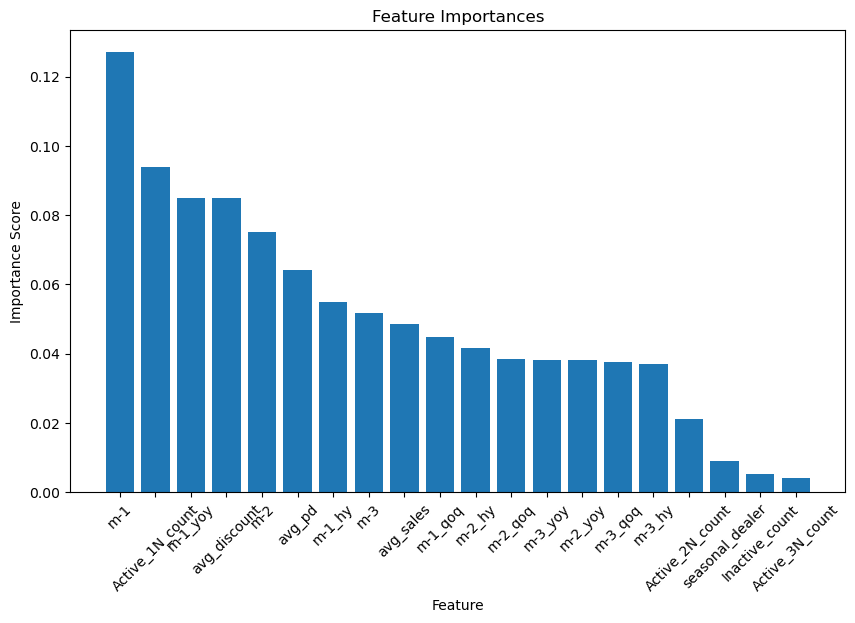

In [1341]:
importances = rf.feature_importances_
import matplotlib.pyplot as plt

# Sort the importances in descending order
indices = importances.argsort()[::-1]

# Get feature names (assuming you have them)
feature_names = X_train_1.columns

# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_1.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_1.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


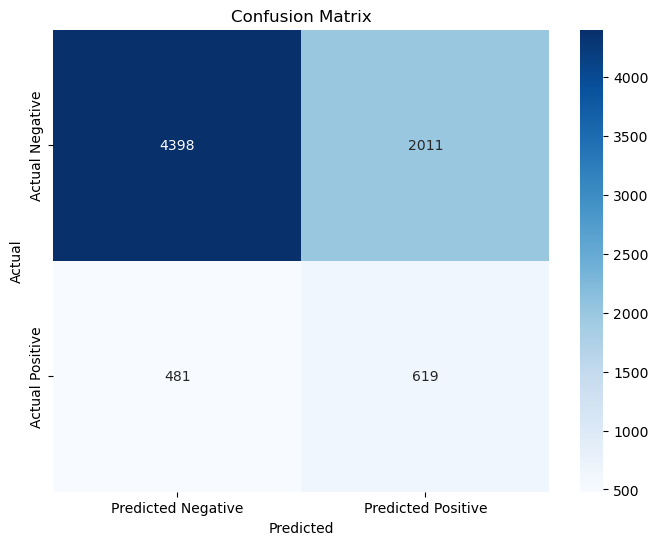

In [1453]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these with your actual predicted and true labels


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_validation_may_3, y_pred_apr_xg)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1458]:
X_validation_may_2['predicted_rf'].value_counts()

0    5706
1    1803
Name: predicted_rf, dtype: int64

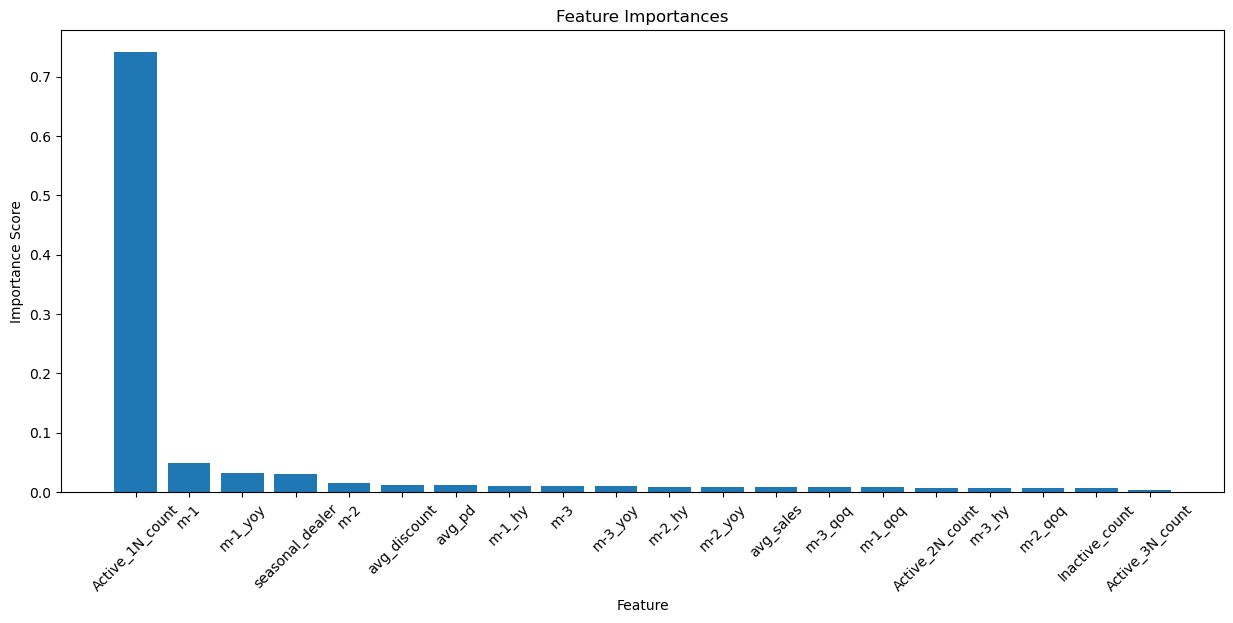

In [1343]:
importances = xg.feature_importances_
import matplotlib.pyplot as plt

# Sort the importances in descending order
indices = importances.argsort()[::-1]

# Get feature names (assuming you have them)
feature_names = X_train_1.columns

# Create a bar chart of feature importances
plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_1.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_1.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


In [1340]:
X_train_1.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales'],
      dtype='object')

In [1459]:
X_validation_may_2

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,state_m,predicted_rf,predicted_xg,change_h2_rating,change_slope_rating
7000004,111.00,46.0,155.0,21.00,-29.00,32.5,-11.50,26.00,135.00,-3.00,...,0.0,0.0,0.0,0.0,61.375000,0,0,0,High_rise,Same
7000010,24.00,0.0,0.0,24.00,0.00,0.0,24.00,0.00,0.00,7.00,...,1.0,1.0,1.0,5.0,5.816667,0,1,1,High_rise,Rise
7000025,132.00,158.0,173.0,-5.00,-9.00,100.0,59.00,49.20,125.00,32.00,...,0.0,0.0,0.0,0.0,125.233333,0,0,0,Rise,Same
7000029,60.00,30.0,185.0,-28.00,-30.00,72.0,-53.00,-58.00,125.00,15.00,...,0.0,0.0,0.0,0.0,80.741667,0,0,0,Same,Rise
7000032,460.00,424.0,959.5,-10.00,-47.00,514.5,15.00,3.00,549.50,5.00,...,0.0,0.0,0.0,0.0,478.041667,0,0,0,Rise,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036024,18.50,13.5,32.0,-56.00,-19.00,-1.5,-15.00,-16.50,-3.00,5.50,...,0.0,0.0,0.0,0.0,39.916667,1,1,0,Fall,High_rise
7036151,12.45,0.0,0.0,12.45,0.00,-10.0,2.45,-9.25,-26.00,12.45,...,1.0,1.0,1.0,1.0,22.195833,1,1,1,NaN,NaN
7036160,46.45,0.0,150.5,-520.10,-451.00,-156.5,-260.55,-280.00,-282.75,46.45,...,1.0,0.0,0.0,0.0,402.729167,1,1,1,NaN,NaN
7036186,12.00,6.0,24.0,-23.00,-24.00,24.0,12.00,-8.50,0.50,12.00,...,1.0,0.0,0.0,0.0,25.041667,1,0,1,NaN,NaN


In [1416]:
X_validation_may_2.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', 'state_m',
       'predicted_rf', 'predicted_xg', 'change_h2_rating',
       'change_slope_rating'],
      dtype='object')

In [1417]:
X_val_scaled = sc.fit_transform(X_validation_may_2.drop(['state_m',
       'predicted_rf', 'predicted_xg', 'change_h2_rating',
       'change_slope_rating'], axis = 1))
y_pred_apr_xg= xg.predict(X_val_scaled)
print(confusion_matrix(y_validation_may_3, y_pred_apr_xg))
print(classification_report(y_validation_may_3, y_pred_apr_xg))

[[5276 1133]
 [ 410  690]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      6409
           1       0.38      0.63      0.47      1100

    accuracy                           0.79      7509
   macro avg       0.65      0.73      0.67      7509
weighted avg       0.85      0.79      0.81      7509



In [1451]:
X_val_scaled = sc.fit_transform(X_validation_may_2.drop(['state_m',
       'predicted_rf', 'predicted_xg', 'change_h2_rating',
       'change_slope_rating'], axis = 1))
y_pred_apr_xg= xg.predict(X_val_scaled)
print(confusion_matrix(y_validation_may_3, y_pred_apr_xg))
print(classification_report(y_validation_may_3, y_pred_apr_xg))

[[4398 2011]
 [ 481  619]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      6409
           1       0.24      0.56      0.33      1100

    accuracy                           0.67      7509
   macro avg       0.57      0.62      0.56      7509
weighted avg       0.80      0.67      0.71      7509



In [655]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
ros = SMOTE(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)
#class_weights = {0: 3.0, 1: 1.0}
xg_1 = xgb.XGBClassifier(
    n_estimators=1000,  # Number of boosting rounds (trees)
    max_depth=1000,        # Maximum depth of each tree
    learning_rate=0.00001,  # Step size shrinkage to prevent overfitting
    random_state=42,
    
)
xg_1.fit(X_train,y_train)
y_pred = xg_1.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2109  138]
 [ 468  310]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2247
           1       0.69      0.40      0.51       778

    accuracy                           0.80      3025
   macro avg       0.76      0.67      0.69      3025
weighted avg       0.79      0.80      0.78      3025



In [1462]:
X_val_scaled = sc.fit_transform(X_validation_may_2.drop(['state_m',
       'predicted_rf', 'predicted_xg', 'change_h2_rating',
       'change_slope_rating'], axis = 1))
y_pred_apr_xg= xg_1.predict(X_val_scaled)
print(confusion_matrix(y_validation_may_3, y_pred_apr_xg))
print(classification_report(y_validation_may_3, y_pred_apr_xg))

[[5276 1133]
 [ 410  690]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      6409
           1       0.38      0.63      0.47      1100

    accuracy                           0.79      7509
   macro avg       0.65      0.73      0.67      7509
weighted avg       0.85      0.79      0.81      7509



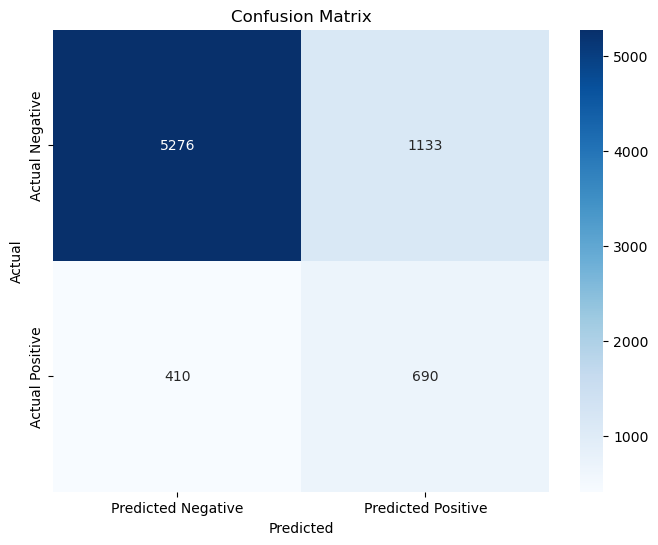

In [1463]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these with your actual predicted and true labels


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_validation_may_3, y_pred_apr_xg)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score: 0.73


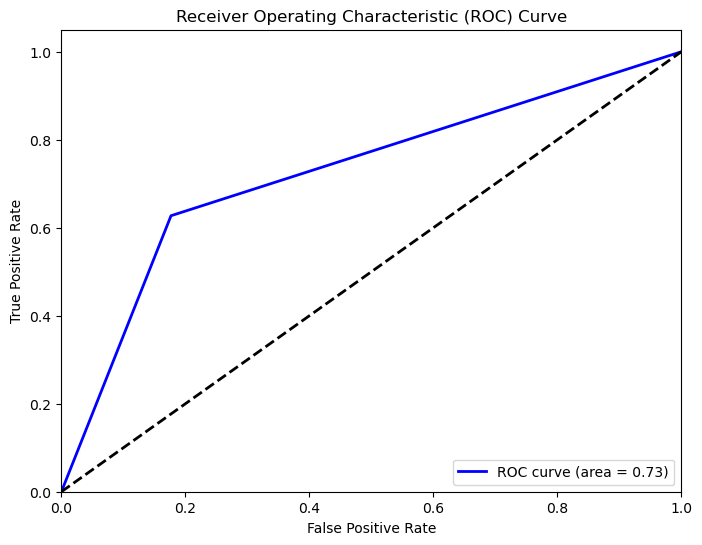

In [1464]:
y_pred_prob = xg_1.predict_proba(X_val_scaled)[:, 1]
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_validation_may_3, y_pred_apr_xg)
print(f"ROC-AUC Score: {roc_auc:.2f}")
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_validation_may_3, y_pred_apr_xg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### May

In [1139]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_may_lr_1= lr_1.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_may_lr_1))
print(classification_report(y_validation_may, y_pred_may_lr_1))

[[2226 4183]
 [  19  387]]
              precision    recall  f1-score   support

           0       0.99      0.35      0.51      6409
           1       0.08      0.95      0.16       406

    accuracy                           0.38      6815
   macro avg       0.54      0.65      0.33      6815
weighted avg       0.94      0.38      0.49      6815



In [1140]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_may_lr_2= lr_2.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_may_lr_2))
print(classification_report(y_validation_may, y_pred_may_lr_2))

[[6074  335]
 [ 259  147]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6409
           1       0.30      0.36      0.33       406

    accuracy                           0.91      6815
   macro avg       0.63      0.65      0.64      6815
weighted avg       0.92      0.91      0.92      6815



In [1141]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_may_rf= rf.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_may_rf))
print(classification_report(y_validation_may, y_pred_may_rf))

[[4724 1685]
 [  78  328]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      6409
           1       0.16      0.81      0.27       406

    accuracy                           0.74      6815
   macro avg       0.57      0.77      0.56      6815
weighted avg       0.93      0.74      0.81      6815



In [1154]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_may_xg= xg.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_may_xg))
print(classification_report(y_validation_may, y_pred_may_xg))

[[5276 1133]
 [ 151  255]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      6409
           1       0.18      0.63      0.28       406

    accuracy                           0.81      6815
   macro avg       0.58      0.73      0.59      6815
weighted avg       0.93      0.81      0.86      6815



In [1155]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_may_nb= nb.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_may_nb))
print(classification_report(y_validation_may, y_pred_may_nb))

[[1865 4544]
 [  28  378]]
              precision    recall  f1-score   support

           0       0.99      0.29      0.45      6409
           1       0.08      0.93      0.14       406

    accuracy                           0.33      6815
   macro avg       0.53      0.61      0.30      6815
weighted avg       0.93      0.33      0.43      6815



In [1157]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_may_bnb= bnb.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_may_bnb))
print(classification_report(y_validation_may, y_pred_may_bnb))

[[5839  570]
 [ 238  168]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      6409
           1       0.23      0.41      0.29       406

    accuracy                           0.88      6815
   macro avg       0.59      0.66      0.61      6815
weighted avg       0.92      0.88      0.90      6815



In [1158]:
X_val_scaled = sc.fit_transform(X_validation_may)
y_pred_may_knn= knn.predict(X_val_scaled)
print(confusion_matrix(y_validation_may, y_pred_may_knn))
print(classification_report(y_validation_may, y_pred_may_knn))

[[5913  496]
 [ 238  168]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6409
           1       0.25      0.41      0.31       406

    accuracy                           0.89      6815
   macro avg       0.61      0.67      0.63      6815
weighted avg       0.92      0.89      0.90      6815



In [1159]:
pred_may_df = pd.DataFrame()
pred_may_df['knn'] =y_pred_may_knn 
pred_may_df['lr_1'] =y_pred_may_lr_1 
pred_may_df['lr_2'] =y_pred_may_lr_2
pred_may_df['rf'] =y_pred_may_rf 
pred_may_df['xg'] =y_pred_may_xg 
pred_may_df['nb'] =y_pred_may_nb
pred_may_df['bnb'] =y_pred_may_bnb

In [1166]:
pred_may_df.index = X_validation_may.index

In [1167]:
pred_may_df['actual'] = y_validation_may

In [1168]:
pred_may_df['ensemble_predicted'] = pred_may_df[['knn', 'lr_1', 'lr_2', 'rf', 'xg', 'nb', 'bnb']].mode(axis = 1)

In [1170]:
print(confusion_matrix(pred_may_df['actual'],pred_may_df['ensemble_predicted']))
print(classification_report(pred_may_df['actual'],pred_may_df['ensemble_predicted']))

[[5547  862]
 [ 159  247]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      6409
           1       0.22      0.61      0.33       406

    accuracy                           0.85      6815
   macro avg       0.60      0.74      0.62      6815
weighted avg       0.93      0.85      0.88      6815



### Engagement List

In [1173]:
pivot_5 = pivot_2[['2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07']]

In [1202]:
pivot_5['change_h2'] = (-pivot_5[['2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01']].mean(axis =1)+pivot_5[['2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07']].mean(axis = 1))/pivot_5[['2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01']].mean(axis =1)

In [1205]:
pivot_5['change_slope'] = (((pivot_5['2023-07']-pivot_5['2023-06'])/pivot_5['2023-06'])+((pivot_5['2023-06']-pivot_5['2023-05'])/pivot_5['2023-05']))/2

In [1203]:
pivot_5 = pivot_5.fillna(0)
pivot_5 = pivot_5.replace({np.inf:0})

In [1183]:
pivot_5 = pivot_5.merge(result_matrix_1['27'],left_index=True , right_index=True, how = 'inner')

In [1204]:
pivot_5 = pivot_5[pivot_5['27']=='Active']

In [674]:
def rating_level(number):
    if number < -0.6:
        return 0
    if number>=-0.6 and number < -0.2:
        return 1
    if number>=-0.2 and number < 0.2:
        return 2
    if number>=0.2 and number <0.6:
        return 3
    if number>=0.6:
        return 4

In [1207]:
pivot_5['change_h2_rating'] = pivot_5['change_h2'].apply(rating_level)
pivot_5['change_slope_rating'] = pivot_5['change_slope'].apply(rating_level)

In [1208]:
pivot_5['change_h2_rating'] = pivot_5['change_h2_rating'].replace({0:'High_fall',1:'Fall',2:'Same',3:'Rise',4:'High_rise'})
pivot_5['change_slope_rating'] = pivot_5['change_slope_rating'].replace({0:'High_fall',1:'Fall',2:'Same',3:'Rise',4:'High_rise'})

In [1209]:
pivot_5

,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,change_h2,change_slope,27,change_h2_rating,change_slope_rating
Sold To Party Code,,,,,,,,,,,,,,,,,
7000004,20.0,20.0,20.0,20.0,122.5,75.0,90.00,155.00,46.0,111.0,96.0,80.0,1.082883,-0.150901,Active,High_rise,Same
7000010,12.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,24.0,12.0,24.0,4.000000,0.250000,Active,High_rise,Rise
7000025,75.0,95.0,48.0,108.8,73.0,167.0,137.00,173.00,158.0,132.0,109.0,147.0,0.510233,0.087191,Active,Rise,Same
7000029,60.0,60.0,60.0,88.0,113.0,60.0,88.00,185.00,30.0,60.0,55.0,90.0,0.151927,0.276515,Active,Same,Rise
7000032,405.0,435.0,410.0,421.0,445.0,471.0,470.00,959.50,424.0,460.0,495.0,517.0,0.285466,0.060266,Active,Rise,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036277,39.0,75.0,26.0,31.0,11.0,72.0,103.00,124.00,77.0,73.0,25.0,90.0,0.937008,0.971233,Active,High_rise,High_rise
7036279,67.0,65.0,30.0,61.0,6.0,22.5,54.00,70.00,17.0,14.0,5.0,7.0,-0.335984,-0.121429,Active,Fall,Same
7036287,89.0,104.0,111.0,122.0,137.0,100.0,111.00,146.00,200.0,207.0,197.0,151.0,0.526395,-0.140906,Active,Rise,Same


In [1220]:
pivot_engagement = pivot_5[(pivot_5['change_h2_rating'].isin(['High_fall','Fall','Same']))&(pivot_5['change_slope_rating'].isin(['High_fall','Fall','Same']))]

In [1217]:
pivot_engagement.drop(['change_h2','change_slope'], axis =1, inplace = True )

In [1224]:
pivot_engagement

,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,change_h2,change_slope,27,change_h2_rating,change_slope_rating,Dealer_size
7000053,144.0,163.0,150.0,130.0,192.0,205.00,188.00,304.00,93.0,80.00,114.0,49.00,-0.158537,-0.072588,Active,Same,Same,Large
7000067,30.0,12.0,34.0,52.0,34.5,38.50,31.00,46.00,26.0,30.00,31.0,40.00,0.014925,0.161828,Active,Same,Same,Small
7000073,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,21.00,26.5,18.00,0.000000,-0.029425,Active,Same,Same,Small
7000075,125.0,124.5,135.0,130.5,171.5,102.00,100.00,267.00,114.0,144.00,157.0,100.00,0.118580,-0.136390,Active,Same,Same,Large
7000110,556.0,803.0,728.0,745.0,1020.0,618.65,907.10,1195.00,676.9,941.00,871.3,666.00,0.175959,-0.154848,Active,Same,Same,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036252,18.0,12.0,12.0,0.0,0.0,2.50,0.00,2.50,2.5,11.75,13.5,12.00,-0.050562,0.018913,Active,Same,Same,Small
7036255,1.0,31.0,30.9,22.1,12.0,13.50,11.00,6.00,26.2,32.20,29.5,25.25,0.177828,-0.113959,Active,Same,Same,Small
7036264,70.0,70.0,25.0,45.0,50.0,45.00,50.00,20.00,20.0,25.00,20.0,20.00,-0.491803,-0.100000,Active,Fall,Same,Small
7036279,67.0,65.0,30.0,61.0,6.0,22.50,54.00,70.00,17.0,14.00,5.0,7.00,-0.335984,-0.121429,Active,Fall,Same,Small


In [1221]:
dealer_size = pd.read_excel('data/segment_dealer_size(AutoRecovered).xlsx',sheet_name='Dealer List')

In [1222]:
dealer_size.index = dealer_size['Dealer_ID']

In [1223]:
pivot_engagement = pivot_engagement.merge(dealer_size['Dealer_size'],left_index=True , right_index=True , how = 'inner' )

In [1227]:
pivot_engagement.columns = ['2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       'change_h2', 'change_slope', 'July_state', 'Level_pattern',
       'Slope_pattern', 'Dealer_size']

In [1229]:
pivot_engagement[pivot_engagement['Dealer_size']!='Large']

,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,change_h2,change_slope,July_state,Level_pattern,Slope_pattern,Dealer_size
7000067,30.0,12.00,34.0,52.0,34.5,38.5,31.00,46.00,26.0,30.00,31.0,40.00,0.014925,0.161828,Active,Same,Same,Small
7000073,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,21.00,26.5,18.00,0.000000,-0.029425,Active,Same,Same,Small
7000147,50.0,40.00,71.0,35.0,50.0,50.0,40.00,76.20,49.0,46.00,25.0,15.00,-0.151351,-0.428261,Active,Same,Fall,Small
7000189,50.0,109.95,22.5,55.0,0.0,70.0,35.00,120.00,0.0,45.00,18.5,30.00,-0.191738,0.016366,Active,Same,Same,Medium
7000243,42.0,11.00,50.0,35.0,55.7,27.0,35.00,30.00,10.0,48.00,27.0,15.00,-0.252379,-0.440972,Active,Fall,Fall,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036252,18.0,12.00,12.0,0.0,0.0,2.5,0.00,2.50,2.5,11.75,13.5,12.00,-0.050562,0.018913,Active,Same,Same,Small
7036255,1.0,31.00,30.9,22.1,12.0,13.5,11.00,6.00,26.2,32.20,29.5,25.25,0.177828,-0.113959,Active,Same,Same,Small
7036264,70.0,70.00,25.0,45.0,50.0,45.0,50.00,20.00,20.0,25.00,20.0,20.00,-0.491803,-0.100000,Active,Fall,Same,Small
7036279,67.0,65.00,30.0,61.0,6.0,22.5,54.00,70.00,17.0,14.00,5.0,7.00,-0.335984,-0.121429,Active,Fall,Same,Small


In [1228]:
pivot_engagement.to_csv('engagement_list.csv')

In [1482]:
X_validation_may_4

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,actual,predicted_rf,predicted_xg,change_h2_rating,change_slope_rating,Dealer_size
7000004,111.00,46.0,155.0,21.00,-29.00,32.50,-11.50,26.00,135.00,-3.00,...,0.0,0.0,0.0,61.375000,Active,Active,Active,High_rise,Same,Large
7000010,24.00,0.0,0.0,24.00,0.00,0.00,24.00,0.00,0.00,7.00,...,1.0,1.0,5.0,5.816667,Active,Active_1N,Active_1N,High_rise,Rise,Small
7000025,132.00,158.0,173.0,-5.00,-9.00,100.00,59.00,49.20,125.00,32.00,...,0.0,0.0,0.0,125.233333,Active,Active,Active,Rise,Same,Large
7000029,60.00,30.0,185.0,-28.00,-30.00,72.00,-53.00,-58.00,125.00,15.00,...,0.0,0.0,0.0,80.741667,Active,Active,Active,Same,Rise,Medium
7000032,460.00,424.0,959.5,-10.00,-47.00,514.50,15.00,3.00,549.50,5.00,...,0.0,0.0,0.0,478.041667,Active,Active,Active,Rise,Same,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035991,15.00,57.0,12.0,-12.50,4.20,-25.95,-22.95,31.00,-43.00,-15.00,...,0.0,0.0,0.0,42.875000,Active_1N,Active,Active,High_fall,Same,Small
7036151,12.45,0.0,0.0,12.45,0.00,-10.00,2.45,-9.25,-26.00,12.45,...,1.0,1.0,1.0,22.195833,Active_1N,Active_1N,Active_1N,High_fall,Same,Small
7036160,46.45,0.0,150.5,-520.10,-451.00,-156.50,-260.55,-280.00,-282.75,46.45,...,0.0,0.0,0.0,402.729167,Active_1N,Active_1N,Active_1N,High_fall,Same,Large
7036186,12.00,6.0,24.0,-23.00,-24.00,24.00,12.00,-8.50,0.50,12.00,...,0.0,0.0,0.0,25.041667,Active_1N,Active,Active_1N,High_fall,Same,Small


In [1530]:
test_data = X_validation_may_4[['avg_sales','predicted_xg','actual','change_h2_rating','Dealer_size']]

In [1531]:
condition = (test_data['avg_sales'] < 20) & (test_data['change_h2_rating'] == 'Rise') & (test_data['Dealer_size'] == 'Small')
test_data.loc[condition, 'predicted_xg'] = 'Active_1N'

In [1532]:
condition = (test_data['change_h2_rating'] == 'High_rise') & (test_data['Dealer_size'] == 'Small')
test_data.loc[condition, 'predicted_xg'] = 'Active'

In [1533]:
condition = (test_data['change_h2_rating'].isin(['Rise','Same','High_rise'])) & (test_data['Dealer_size'] == 'Medium')
test_data.loc[condition, 'predicted_xg'] = 'Active'

In [1534]:
condition = (test_data['change_h2_rating'].isin(['Rise','High_rise'])) & (test_data['Dealer_size'] == 'Large')
test_data.loc[condition, 'predicted_xg'] = 'Active'

In [1535]:
condition = (test_data['avg_sales'] < 100) & (test_data['change_h2_rating'] == 'Fall') & (test_data['Dealer_size'] == 'Large')
test_data.loc[condition, 'predicted_xg'] = 'Active_1N'

In [1536]:
condition = (test_data['avg_sales'] < 50) & (test_data['change_h2_rating'] == 'Same') & (test_data['Dealer_size'] == 'Large')
test_data.loc[condition, 'predicted_xg'] = 'Active_1N'

In [1537]:
test_data[['predicted_xg','actual']] = test_data[['predicted_xg','actual']].replace({'Active':0 , 'Active_1N':1})

In [1538]:
print(confusion_matrix(test_data['actual'],test_data['predicted_xg']))

[[5536  808]
 [ 458  579]]


In [1540]:
X_validation_may_4['predicted_xg'] = X_validation_may_4['predicted_xg'].replace({'Active':0 , 'Active_1N':1})

In [1541]:
print(confusion_matrix(X_validation_may_4['actual'],X_validation_may_4['predicted_xg']))

[[5260 1084]
 [ 395  642]]


In [1542]:
X_validation_may_4[X_validation_may_4['Dealer_size']=='Large'].shape

(3535, 26)

In [1543]:
X_validation_may_4[X_validation_may_4['Dealer_size']=='Medium'].shape

(909, 26)

In [1545]:
X_validation_may_4[X_validation_may_4['Dealer_size']=='Small'].shape

(2937, 26)

In [385]:
data_3 = data_3.merge(dat)

,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,...,1st_half,2st_half,diff,dealer_id,diff_%,total_sales,dealer_size,total_orders,predicted_rf,predict_probablity
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7000004,20.0,20.0,20.00,20.0,122.50,75.0,90.00,155.00,46.0,111.0,...,277.50,578.00,108.288288,7000004,35.631560,M,Medium,M,0,High
7000010,12.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,24.0,...,12.00,60.00,400.000000,7000010,23.801064,L,Small,L,1,Medium
7000025,75.0,95.0,48.00,108.8,73.00,167.0,137.00,173.00,158.0,132.0,...,566.80,856.00,51.023289,7000025,16.091194,M,Medium,M,0,High
7000027,513.0,5.0,171.95,207.5,92.00,68.5,35.00,144.95,0.0,0.0,...,1057.95,179.95,-82.990690,7000027,-10.631377,M,Large,M,0,High
7000029,60.0,60.0,60.00,88.0,113.00,60.0,88.00,185.00,30.0,60.0,...,441.00,508.00,15.192744,7000029,4.064227,M,Medium,M,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036271,5.0,12.0,22.50,7.0,12.75,7.0,0.00,0.00,7.5,0.0,...,66.25,9.50,-85.660377,7036271,35.885705,L,Small,M,1,Medium
7036277,39.0,75.0,26.00,31.0,11.00,72.0,103.00,124.00,77.0,73.0,...,254.00,492.00,93.700787,7036277,19.238393,M,Medium,M,0,High
7036279,67.0,65.0,30.00,61.0,6.00,22.5,54.00,70.00,17.0,14.0,...,251.50,167.00,-33.598410,7036279,54.430631,M,Medium,M,0,Medium


In [436]:
pivot_n = pivot_2.drop(['month_new_dealer', '25',
       '26', '27'], axis = 1)

In [437]:
pivot_n = pivot_n[['2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07']]

In [441]:
result_matrix_n = result_matrix_1[[ '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28']]

In [442]:
result_matrix_n = result_matrix_n[result_matrix_n.index.isin(pivot_n.index)]

In [443]:
result_matrix_n

,17,18,19,20,21,22,23,24,25,26,27,28
Sold To Party Code,,,,,,,,,,,,
7000004,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7000015,Active,Active,Active,Active,Active_1N,Active_2N,Active_3N,Inactive,Inactive,Inactive,Inactive,Inactive
7000025,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7000027,Active,Active,Active,Active,Active,Active,Active,Active,Active_1N,Active_2N,Active_3N,Inactive
7000029,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
7036277,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7036279,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7036287,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active


In [502]:
aug_data = pd.DataFrame()
aug_data[['m-3','m-2','m-1']] = dealer_sales[['2023-04', '2023-05', '2023-06']]

In [507]:
aug_data['m-1_qoq'] = dealer_sales['2023-06']-dealer_sales['2023-03']
aug_data['m-2_qoq'] = dealer_sales['2023-05']-dealer_sales['2023-02']
aug_data['m-3_qoq'] = dealer_sales['2023-04']-dealer_sales['2023-01']
aug_data['m-1_hy'] = dealer_sales['2023-06']-dealer_sales['2022-12']
aug_data['m-2_hy'] = dealer_sales['2023-05']-dealer_sales['2022-11']
aug_data['m-3_hy'] = dealer_sales['2023-04']-dealer_sales['2022-10']
aug_data['m-1_yoy'] = dealer_sales['2023-06']-dealer_sales['2022-06']
aug_data['m-2_yoy'] = dealer_sales['2023-05']-dealer_sales['2022-05']
aug_data['m-3_yoy'] = dealer_sales['2023-04']-dealer_sales['2022-04']

In [517]:
result_matrix_aug = result_matrix_1[[ '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27']]

In [520]:
status_columns = result_matrix_aug.columns[1:]  # Exclude the "Identifier" column
for index, row in result_matrix_aug.iterrows():
    row_counts = row[status_columns].value_counts()
    for status_col, count in row_counts.items():
        result_matrix_aug.at[index, f"{status_col}_count"] = count
result_matrix_aug = result_matrix_aug[['Inactive_count', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count']]

In [522]:
result_matrix_aug = result_matrix_aug.fillna(0)

In [524]:
aug_data = aug_data.merge(result_matrix_aug,left_index=True , right_index=True , how = 'inner')

In [530]:
aug_data = aug_data.merge(val_data['seasonal_dealer'], left_index=True , right_index=True , how = 'inner')

In [532]:
aug_data = aug_data.merge(discount_df['avg_discount'], left_index = True , 
                          right_index = True , how = 'inner').merge(pd_df['avg_pd'] , left_index = True , 
                                                                    right_index=True , how = 'inner')

In [539]:
pivot_aug = pivot[['2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06']]

In [540]:
pivot_aug['avg_sales'] = pivot_aug.mean(axis = 1)

In [542]:
aug_data = aug_data.merge(pivot_aug['avg_sales'], left_index = True , right_index = True , how = 'inner')

In [548]:
aug_data = aug_data.merge(result_matrix_1['28'],left_index=True , right_index=True ,how = 'inner')

In [550]:
aug_data = aug_data.merge(result_matrix_1['27'],left_index=True , right_index=True ,how = 'inner')

In [552]:
aug_data = aug_data[aug_data['27']=='Active']

In [604]:
#july_data = pd.DataFrame()

In [618]:
jul_data = pd.DataFrame()
jul_data[['m-3','m-2','m-1']] = dealer_sales[['2023-03', '2023-04', '2023-05']]
jul_data['m-1_qoq'] = dealer_sales['2023-05']-dealer_sales['2023-02']
jul_data['m-2_qoq'] = dealer_sales['2023-04']-dealer_sales['2023-01']
jul_data['m-3_qoq'] = dealer_sales['2023-03']-dealer_sales['2022-12']
jul_data['m-1_hy'] = dealer_sales['2023-05']-dealer_sales['2022-11']
jul_data['m-2_hy'] = dealer_sales['2023-04']-dealer_sales['2022-10']
jul_data['m-3_hy'] = dealer_sales['2023-03']-dealer_sales['2022-09']
jul_data['m-1_yoy'] = dealer_sales['2023-05']-dealer_sales['2022-05']
jul_data['m-2_yoy'] = dealer_sales['2023-04']-dealer_sales['2022-04']
jul_data['m-3_yoy'] = dealer_sales['2023-03']-dealer_sales['2022-03']

In [619]:
jul_data = jul_data.merge(result_matrix_1['27'] , left_index=True , right_index = True , how = 'inner')

In [622]:
jul_data = jul_data[jul_data['27']=='Active_1N']

In [623]:
result_matrix_jul = result_matrix_1[[ '15','16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26']]
status_columns = result_matrix_jul.columns[1:]  # Exclude the "Identifier" column
for index, row in result_matrix_jul.iterrows():
    row_counts = row[status_columns].value_counts()
    for status_col, count in row_counts.items():
        result_matrix_jul.at[index, f"{status_col}_count"] = count
result_matrix_jul = result_matrix_jul[['Inactive_count', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count']]

In [624]:
result_matrix_jul = result_matrix_jul.fillna(0)

In [625]:
result_matrix_jul

,Inactive_count,Active_1N_count,Active_2N_count,Active_3N_count
Sold To Party Code,,,,
7000004,0.0,0.0,0.0,0.0
7000010,5.0,1.0,1.0,1.0
7000015,3.0,1.0,1.0,1.0
7000022,0.0,2.0,0.0,0.0
7000025,0.0,0.0,0.0,0.0
...,...,...,...,...
7036491,0.0,0.0,0.0,0.0
7036499,0.0,0.0,0.0,0.0
7036501,0.0,0.0,0.0,0.0


In [626]:
result_matrix_jul = result_matrix_jul[result_matrix_jul.index.isin(jul_data.index)]

In [627]:
jul_data = jul_data.merge(result_matrix_jul , left_index = True , right_index = True )

In [628]:
jul_data['seasonal_dealer'] = 0

In [629]:
jul_data = jul_data.merge(pivot_aug['avg_sales'] , left_index=True , right_index = True , how = 'inner')

In [630]:
jul_data = jul_data.merge(discount_df['avg_discount'], left_index = True , 
                          right_index = True , how = 'inner').merge(pd_df['avg_pd'] , left_index = True , 
                                                                    right_index=True , how = 'inner')

In [631]:
aug_data

,m-3,m-2,m-1,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,Inactive_count,Active_1N_count,Active_2N_count,Active_3N_count,seasonal_dealer,avg_discount,avg_pd,avg_sales,28,27
7000004,46.0,111.0,96.0,-59.00,21.00,-29.0,-26.5,91.0,26.0,61.0,...,0.0,0.0,0.0,0.0,0,43151.648858,11695.633958,66.458333,Active,Active
7000010,0.0,24.0,12.0,12.00,24.00,0.0,12.0,24.0,0.0,12.0,...,5.0,1.0,1.0,1.0,0,4134.300000,2391.925000,6.816667,Active,Active
7000025,158.0,132.0,109.0,-64.00,-5.00,-9.0,36.0,23.2,110.0,-52.0,...,0.0,0.0,0.0,0.0,0,79543.649142,19134.488333,120.900000,Active,Active
7000029,30.0,60.0,55.0,-130.00,-28.00,-30.0,-58.0,-28.0,-30.0,-79.9,...,0.0,0.0,0.0,0.0,0,46829.546458,14684.995000,74.083333,Active,Active
7000032,424.0,460.0,495.0,-464.50,-10.00,-47.0,50.0,39.0,14.0,60.0,...,0.0,0.0,0.0,0.0,0,390783.017550,92230.039583,483.041667,Active,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036264,20.0,25.0,20.0,0.00,-25.00,-25.0,-30.0,-20.0,-5.0,-20.0,...,0.0,0.0,0.0,0.0,0,41721.350875,24579.631667,40.000000,Active,Active
7036277,77.0,73.0,25.0,-99.00,-30.00,5.0,14.0,42.0,51.0,-79.0,...,0.0,0.0,0.0,0.0,0,27639.834775,11282.864167,60.916667,Active,Active
7036279,17.0,14.0,5.0,-65.00,-40.00,-5.5,-1.0,-47.0,-13.0,-81.0,...,0.0,0.0,0.0,0.0,0,67145.619800,44230.340833,40.458333,Active,Active
7036287,200.0,207.0,197.0,51.00,96.00,100.0,60.0,85.0,89.0,23.0,...,0.0,0.0,0.0,0.0,0,104054.866550,20164.389167,135.666667,Active,Active


In [632]:
jul_data

,m-3,m-2,m-1,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,m-3_yoy,27,Inactive_count,Active_1N_count,Active_2N_count,Active_3N_count,seasonal_dealer,avg_sales,avg_discount,avg_pd
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000139,12.0,24.0,12.0,-36.0,24.00,-48.0,-44.00,-24.00,-36.0,-32.0,...,-37.0,Active_1N,0.0,1.0,0.0,0.0,0,31.666667,27118.644167,10786.706667
7000235,5.0,15.0,12.5,-23.5,-5.00,-11.0,0.50,0.50,-34.5,-7.0,...,-2.5,Active_1N,0.0,0.0,0.0,0.0,0,17.291667,7937.752967,4178.493333
7000364,33.0,37.0,5.0,-25.0,-14.00,-6.0,5.00,0.50,-22.0,-12.5,...,-113.0,Active_1N,0.0,1.0,0.0,0.0,0,30.458333,17839.394400,9804.781250
7000609,0.0,30.0,30.0,-10.0,30.00,-30.0,5.00,5.00,-10.0,-10.0,...,-40.0,Active_1N,0.0,2.0,0.0,0.0,0,20.833333,12492.736875,4628.294167
7000627,82.0,12.5,14.0,-46.0,-47.50,34.0,-22.00,-24.00,10.0,-22.0,...,-27.0,Active_1N,0.0,0.0,0.0,0.0,0,39.958333,31106.925942,8345.318333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036336,52.0,10.0,8.0,8.0,-30.00,24.5,-2.00,-53.35,31.0,0.0,...,52.0,Active_1N,0.0,1.0,0.0,0.0,0,26.862500,12969.512300,6811.265000
7036372,0.0,0.0,7.0,4.6,-8.15,-46.3,-50.45,-32.25,-64.0,-16.0,...,0.0,Active_1N,0.0,1.0,1.0,0.0,0,33.158333,39339.350408,22205.886667
7036391,20.0,20.0,20.0,0.0,20.00,8.0,20.00,15.00,-3.0,0.0,...,20.0,Active_1N,0.0,3.0,0.0,0.0,0,11.333333,4977.622083,2701.820000


In [638]:
aug_data = aug_data[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', '27','28']]
jul_data = jul_data[['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', '27']]

In [639]:
aug_data.drop('27', axis = 1 , inplace = True)

In [643]:
jul_data.columns = ['m-1', 'm-2', 'm-3', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'seasonal_dealer',
       'avg_discount', 'avg_pd', 'Active_1N_count', 'Active_2N_count',
       'Active_3N_count', 'Inactive_count', 'avg_sales', '28']

In [646]:
val_aug_jul = pd.concat([aug_data,jul_data] , axis = 0)

In [648]:
X_aug_jul = val_aug_jul.drop('28' , axis = 1)
y_aug_jul = val_aug_jul['28'].replace({'Active':0 , 'Active_1N':1})

In [649]:
X_val_scaled = sc.fit_transform(X_aug_jul)
y_pred_aug_jul= rf.predict(X_val_scaled)
print(confusion_matrix(y_aug_jul, y_pred_aug_jul))
print(classification_report(y_aug_jul, y_pred_aug_jul))

[[5216  967]
 [ 294  501]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6183
           1       0.34      0.63      0.44       795

    accuracy                           0.82      6978
   macro avg       0.64      0.74      0.67      6978
weighted avg       0.88      0.82      0.84      6978



In [659]:
X_val_scaled = sc.fit_transform(X_aug_jul)
y_pred_aug_jul_xg= xg_1.predict(X_val_scaled)
print(confusion_matrix(y_aug_jul, y_pred_aug_jul_xg))
print(classification_report(y_aug_jul, y_pred_aug_jul_xg))

[[5171 1012]
 [ 306  489]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6183
           1       0.33      0.62      0.43       795

    accuracy                           0.81      6978
   macro avg       0.63      0.73      0.66      6978
weighted avg       0.87      0.81      0.83      6978



In [660]:
val_aug_jul['predicted_rf'] = y_pred_aug_jul
val_aug_jul['predicted_xg'] = y_pred_aug_jul_xg

In [661]:
val_aug_jul[['predicted_rf','predicted_xg']] = val_aug_jul[['predicted_rf','predicted_xg']].replace({0:'Active',1:'Active_1N'})

In [723]:
pivot['change_h2'] = (pivot[['2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06']].sum(axis = 1)-pivot[['2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12']].sum(axis = 1))/(pivot[['2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12']].sum(axis = 1))
pivot['change_h2'] = pivot['change_h2'].fillna(0)

In [724]:
def rating_level(number):
    if number < -0.6:
        return 0
    if number>=-0.6 and number < -0.2:
        return 1
    if number>=-0.2 and number < 0.2:
        return 2
    if number>=0.2 and number <0.6:
        return 3
    if number>=0.6:
        return 4

In [725]:
pivot['change_h2_rating'] = pivot['change_h2'].apply(rating_level)

In [726]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 7000004 to 7041503
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   2021-04           16346 non-null  float64
 1   2021-05           16346 non-null  float64
 2   2021-06           16346 non-null  float64
 3   2021-07           16346 non-null  float64
 4   2021-08           16346 non-null  float64
 5   2021-09           16346 non-null  float64
 6   2021-10           16346 non-null  float64
 7   2021-11           16346 non-null  float64
 8   2021-12           16346 non-null  float64
 9   2022-01           16346 non-null  float64
 10  2022-02           16346 non-null  float64
 11  2022-03           16346 non-null  float64
 12  2022-04           16346 non-null  float64
 13  2022-05           16346 non-null  float64
 14  2022-06           16346 non-null  float64
 15  2022-07           16346 non-null  float64
 16  2022-08           16346 non-null

In [727]:
pivot['change_h2_rating'] = pivot['change_h2_rating'].replace({0:'High_fall',1:'Fall',2:'Same',3:'Rise',4:'High_rise'})

In [789]:
pivot.to_csv('change_rating.csv')

In [752]:
test_data = val_aug_jul.merge(pivot['change_h2_rating'] , left_index = True , right_index=True , how = 'inner')

In [753]:
test_data = test_data.merge(data_3['dealer_size'] , left_index = True , right_index = True , how = 'inner')

In [754]:
#test_data = test_data.merge(val_1['predicted_xg'] , left_index=True, right_index = True , how = 'inner')
condition = (test_data['avg_sales'] > 20) & (test_data['change_h2_rating'] == 'Rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['change_h2_rating'] == 'High_rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','Same','High_rise'])) & (test_data['dealer_size'] == 'Medium')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','High_rise'])) & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['avg_sales'] > 100) & (test_data['change_h2_rating'] == 'Fall') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'
condition = (test_data['avg_sales'] > 50) & (test_data['change_h2_rating'] == 'Same') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_xg'] = 'Active'

In [755]:
print('Adjusted XGBOOST')
print(confusion_matrix(test_data['28'] , test_data['predicted_xg']))
print(classification_report(test_data['28'] , test_data['predicted_xg']))

Adjusted XGBOOST
[[5726  457]
 [ 433  332]]
              precision    recall  f1-score   support

      Active       0.93      0.93      0.93      6183
   Active_1N       0.42      0.43      0.43       765

    accuracy                           0.87      6948
   macro avg       0.68      0.68      0.68      6948
weighted avg       0.87      0.87      0.87      6948



In [750]:
print('XGBOOST Result')
val_aug_jul = val_aug_jul[val_aug_jul.index.isin(test_data.index)]
print(confusion_matrix(val_aug_jul['28'] , val_aug_jul['predicted_xg']))
print(classification_report(val_aug_jul['28'] , val_aug_jul['predicted_xg']))

XGBOOST Result
[[5171 1012]
 [ 297  468]]
              precision    recall  f1-score   support

      Active       0.95      0.84      0.89      6183
   Active_1N       0.32      0.61      0.42       765

    accuracy                           0.81      6948
   macro avg       0.63      0.72      0.65      6948
weighted avg       0.88      0.81      0.84      6948



In [758]:
test_data

,m-1,m-2,m-3,m-1_qoq,m-2_qoq,m-3_qoq,m-1_hy,m-2_hy,m-3_hy,m-1_yoy,...,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count,avg_sales,28,predicted_rf,predicted_xg,change_h2_rating,dealer_size
7000004,96.0,111.0,46.0,-59.0,21.0,-29.0,-26.5,91.0,26.00,61.00,...,0.0,0.0,0.0,0.0,66.458333,Active,Active,Active,High_rise,Medium
7000010,12.0,24.0,0.0,12.0,24.0,0.0,12.0,24.0,0.00,12.00,...,1.0,1.0,1.0,5.0,6.816667,Active,Active_1N,Active_1N,Fall,Small
7000025,109.0,132.0,158.0,-64.0,-5.0,-9.0,36.0,23.2,110.00,-52.00,...,0.0,0.0,0.0,0.0,120.900000,Active,Active,Active,Rise,Medium
7000029,55.0,60.0,30.0,-130.0,-28.0,-30.0,-58.0,-28.0,-30.00,-79.90,...,0.0,0.0,0.0,0.0,74.083333,Active,Active,Active,Same,Medium
7000032,495.0,460.0,424.0,-464.5,-10.0,-47.0,50.0,39.0,14.00,60.00,...,0.0,0.0,0.0,0.0,483.041667,Active,Active,Active,Rise,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036159,10.0,7.5,20.0,2.5,-2.5,10.0,0.0,7.5,20.00,5.00,...,1.0,2.0,0.0,0.0,6.750000,Active_1N,Active_1N,Active,High_rise,Small
7036177,20.0,25.0,20.0,-5.0,-24.0,20.0,20.0,25.0,0.00,0.00,...,1.0,2.0,2.0,0.0,13.250000,Active_1N,Active_1N,Active,High_rise,Small
7036193,8.5,0.0,10.0,-6.5,-6.0,7.5,8.5,-2.5,-3.00,-32.15,...,2.0,0.0,0.0,0.0,7.000000,Active_1N,Active_1N,Active_1N,Same,Small
7036204,5.0,7.5,0.0,0.0,-10.0,-32.5,-37.5,0.0,-78.95,-55.00,...,1.0,0.0,0.0,0.0,23.700000,Active_1N,Active_1N,Active_1N,High_fall,Medium


In [738]:
#test_data = test_data.merge(val_1['predicted_xg'] , left_index=True, right_index = True , how = 'inner')
condition = (test_data['avg_sales'] > 20) & (test_data['change_h2_rating'] == 'Rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'] == 'High_rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','Same','High_rise'])) & (test_data['dealer_size'] == 'Medium')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','High_rise'])) & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 100) & (test_data['change_h2_rating'] == 'Fall') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 50) & (test_data['change_h2_rating'] == 'Same') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_xg'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'

In [739]:
print(confusion_matrix(test_data['28'] , test_data['predicted_rf']))
print(classification_report(test_data['28'] , test_data['predicted_rf']))

[[5484  699]
 [ 393  372]]
              precision    recall  f1-score   support

      Active       0.93      0.89      0.91      6183
   Active_1N       0.35      0.49      0.41       765

    accuracy                           0.84      6948
   macro avg       0.64      0.69      0.66      6948
weighted avg       0.87      0.84      0.85      6948



In [748]:
print('Random Forest Result')
val_aug_jul = val_aug_jul[val_aug_jul.index.isin(test_data.index)]
print(confusion_matrix(val_aug_jul['28'] , val_aug_jul['predicted_rf']))
print(classification_report(val_aug_jul['28'] , val_aug_jul['predicted_rf']))

Random Forest Result
[[5216  967]
 [ 293  472]]
              precision    recall  f1-score   support

      Active       0.95      0.84      0.89      6183
   Active_1N       0.33      0.62      0.43       765

    accuracy                           0.82      6948
   macro avg       0.64      0.73      0.66      6948
weighted avg       0.88      0.82      0.84      6948



In [458]:
def active(df):
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            val = df.iloc[i,j]
            if val>0 and val<=5:
                df.iloc[i,j] = 'Active_v_low'
            if val>5 and val<=20:
                df.iloc[i,j] ='Active_low'
            if val>20 and val<=70:
                df.iloc[i,j] ='Active_medium'
            if val>70 and val<=150:
                df.iloc[i,j] ='Active_high'
            if val>150:
                df.iloc[i,j] ='Active_v_high'
    return df
pivot_m =  active(pivot_n)      
        

In [461]:
def active_n(df1 , df2):
    for i in range(df1.shape[0]):
        for j in range(df1.shape[1]):
            val = df2.iloc[i,j]
            if val!='Active':
                df1.iloc[i,j] = val
    return df1
pivot_m = active_n(pivot_m , result_matrix_n)

In [464]:
def apply_color(val):
    if val == 'Active_v_low':
        color = 'background-color: lightgreen'
    elif val == 'Active_low':
        color = 'background-color: lightgreen'
    elif val == 'Active_medium':
        color = 'background-color: lightgreen' 
    elif val == 'Active_high':
        color = 'background-color: lightgreen'
    elif val == 'Active_v_high':
        color = 'background-color: lightgreen'
    elif val == 'Active_1N':
        color = 'background-color: lightblue'
    elif val == 'Active_2N':
        color = 'background-color: yellow'
    elif val == 'Active_3N':
        color = 'background-color: lightorange'
    elif val == 'Inactive': 
        color = 'background-color: orange' 
    elif val == 'Churn':
        color = 'background-color: red'
    else:
        color = 'background-color: gray'# No color for other classes
    return color

In [465]:
styled_df = pivot_m.style.applymap(apply_color)

In [467]:
styled_df.to_excel('activity_matrix_n.xlsx')

In [759]:
test_data.to_csv('dealer_size_1.csv')

,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
Sold To Party Code,,,,,,,,,,,,
7000004,Active_low,Active_low,Active_low,Active_low,Active_high,Active_high,Active_high,Active_v_high,Active_medium,Active_high,Active_high,Active_high
7000015,Active_medium,Active_medium,Active_high,Active_medium,Active_1N,Active_2N,Active_3N,Inactive,Inactive,Inactive,Inactive,Inactive
7000025,Active_high,Active_high,Active_medium,Active_high,Active_high,Active_v_high,Active_high,Active_v_high,Active_v_high,Active_high,Active_high,Active_high
7000027,Active_v_high,Active_v_low,Active_v_high,Active_v_high,Active_high,Active_medium,Active_medium,Active_high,Active_1N,Active_2N,Active_3N,Inactive
7000029,Active_medium,Active_medium,Active_medium,Active_high,Active_high,Active_medium,Active_high,Active_v_high,Active_medium,Active_medium,Active_medium,Active_high
...,...,...,...,...,...,...,...,...,...,...,...,...
7036277,Active_medium,Active_high,Active_medium,Active_medium,Active_low,Active_high,Active_high,Active_high,Active_high,Active_high,Active_medium,Active_high
7036279,Active_medium,Active_medium,Active_medium,Active_medium,Active_low,Active_medium,Active_medium,Active_medium,Active_low,Active_low,Active_v_low,Active_low
7036287,Active_high,Active_high,Active_high,Active_high,Active_high,Active_high,Active_high,Active_high,Active_v_high,Active_v_high,Active_v_high,Active_v_high
